In [1]:
## Loading Some Packages
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn import preprocessing as pr
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import SparsePCA
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pygam as pyg
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.datasets import make_regression

c:\Users\asus\OneDrive\Stochastics and Data Science\Semester 3\Statistcal Machine learning\Project\Motor Insurance\venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\asus\OneDrive\Stochastics and Data Science\Semester 3\Statistcal Machine learning\Project\Motor Insurance\venv\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\asus\OneDrive\Stochastics and Data Science\Semester 3\Statistcal Machine learning\Project\Motor Insurance\venv\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Loading the Data Set

In [2]:
## Calling the data set and converting it to dataframe
training= pd.read_csv("Train_VehCSV.csv")
trainscaled=pd.DataFrame(training, columns= training.columns)

In [3]:
## Since we noticed in data that there are some outliers we are taking 99% of the values so that some high claim cost are removed from data. This is to make model more coherent.
Out1=np.percentile(trainscaled['UltimateIncurredClaimCost'],99)

In [4]:
print(Out1)

137366.66220000002


In [5]:
## Since we noticed in data that there are some outliers we are taking 99% of the values so that some high claim cost are removed from data. This is to make model more coherent.
trainscaled=trainscaled[trainscaled['UltimateIncurredClaimCost'] < 137370]

In [6]:
## It was noticed in the preliminary Analysis of the data that there are some policyholders who worked more that 60 hours of week and even more hours than there are in one week.
## These policyholders have been removed since this may require some preliminary investigation in the data provided by the policyholders and hence have been removed.
trainscaled= trainscaled[trainscaled['HoursWorkedPerWeek'] <= 60]

In [7]:
trainscaled= trainscaled[trainscaled['Age'] >= 16]

Checking the Data

In [8]:
## Checking forn NULL values
trainscaled.isnull().sum()

ClaimNumber                   0
DateTimeOfAccident            0
Day_Reported                  0
Month_Reported                0
Year_Reported                 0
Age                           0
Gender                        0
MaritalStatus                21
DependentChildren             0
DependentsOther               0
WeeklyWages                  55
PartTimeFullTime              0
HoursWorkedPerWeek            0
DaysWorkedPerWeek             0
ClaimDescription              0
InitialIncurredCalimsCost     0
UltimateIncurredClaimCost     0
dtype: int64

Filling the NA's in the data set

In [9]:
trainscaled['WeeklyWages']=trainscaled['WeeklyWages'].fillna(trainscaled['WeeklyWages'].mean())  ## Filling with Mean
trainscaled['HoursWorkedPerWeek']=trainscaled['HoursWorkedPerWeek'].fillna(trainscaled['HoursWorkedPerWeek'].mean())  ## Filling with Mean
trainscaled['MaritalStatus']=trainscaled['MaritalStatus'].fillna(trainscaled['MaritalStatus'].mode()[0])  ## Filling with Mode

In [10]:
trainscaled.isnull().sum()   ## Checking NA's Again

ClaimNumber                  0
DateTimeOfAccident           0
Day_Reported                 0
Month_Reported               0
Year_Reported                0
Age                          0
Gender                       0
MaritalStatus                0
DependentChildren            0
DependentsOther              0
WeeklyWages                  0
PartTimeFullTime             0
HoursWorkedPerWeek           0
DaysWorkedPerWeek            0
ClaimDescription             0
InitialIncurredCalimsCost    0
UltimateIncurredClaimCost    0
dtype: int64

In [11]:
trainscaled.describe()

Day_Reported  Month_Reported  Year_Reported           Age  \
count  35372.000000    35372.000000   35372.000000  35372.000000   
mean      15.956915        6.596743    1996.543509     33.797410   
std        8.859890        3.394104       5.188407     12.077724   
min        1.000000        1.000000    1988.000000     16.000000   
25%        8.000000        4.000000    1992.000000     23.000000   
50%       16.000000        7.000000    1997.000000     32.000000   
75%       24.000000       10.000000    2001.000000     43.000000   
max       31.000000       12.000000    2006.000000     79.000000   

       DependentChildren  DependentsOther   WeeklyWages  HoursWorkedPerWeek  \
count       35372.000000     35372.000000  35372.000000        35372.000000   
mean            0.119784         0.009414    412.660652           37.277255   
std             0.520575         0.105791    233.738716            6.170871   
min             0.000000         0.000000      1.000000            0.000000   
25%             0.000000         0.000000    200.000000           38.000000   
50%             0.000000         0.000000    391.600000           38.000000   
75%             0.000000         0.000000    500.000000           40.000000   
max             8.000000         3.000000   6453.000000           60.000000   

       DaysWorkedPerWeek  InitialIncurredCalimsCost  UltimateIncurredClaimCost  
count       35372.000000               35372.000000               35372.000000  
mean            4.899864                7245.174064                8727.684003  
std             0.526296               15616.298420               16530.764991  
min             1.000000                   1.000000                 121.886805  
25%             5.000000                 662.500000                 912.042556  
50%             5.000000                2000.000000                3286.112940  
75%             5.000000                9000.000000                7913.093281  
max             7.000000              690000.000000              137241.120200

Explonatory Data Analysis for Training Data Set

First we start with the data representation to understad the how the data is given and study any particular characterstics

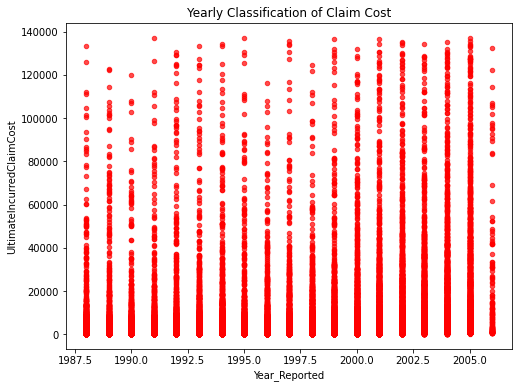

In [12]:
## Yearly Classification of Claim Cost
fig, ax = plt.subplots(figsize=(8,6))
trainscaled.groupby('Year_Reported').plot(kind='scatter', x = "Year_Reported", y = "UltimateIncurredClaimCost", ax=ax, color= 'r', alpha= 0.7)
plt.title("Yearly Classification of Claim Cost")
plt.show()

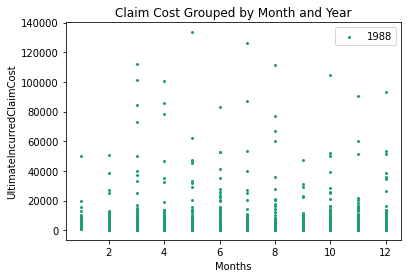

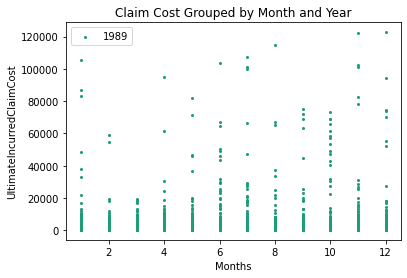

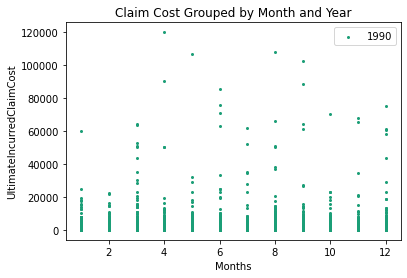

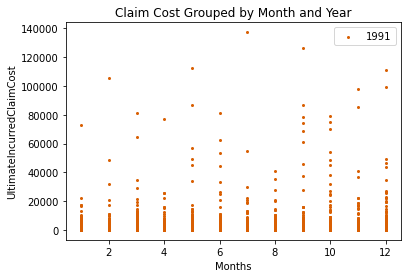

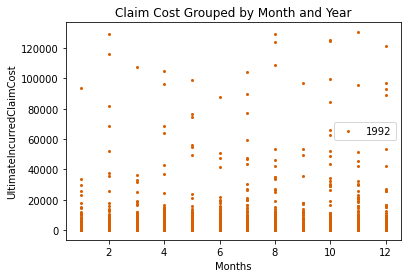

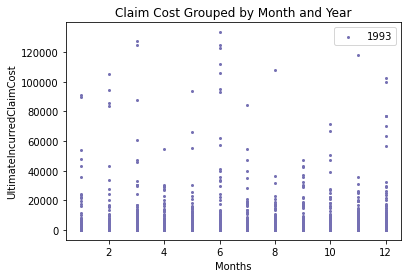

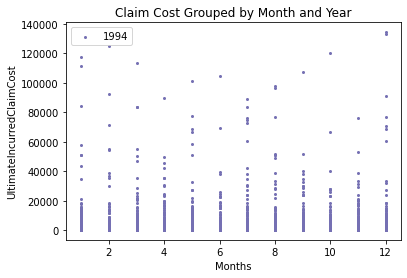

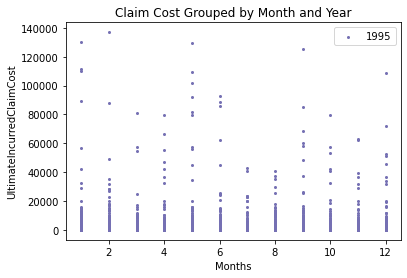

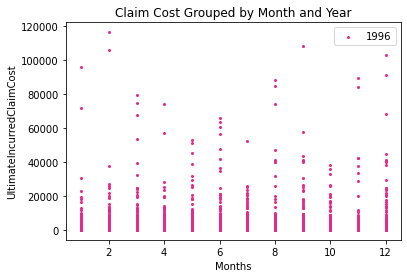

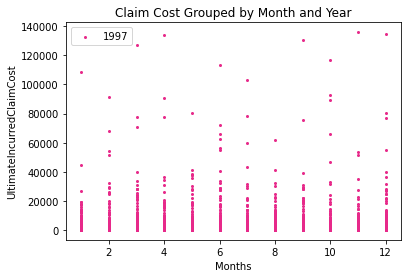

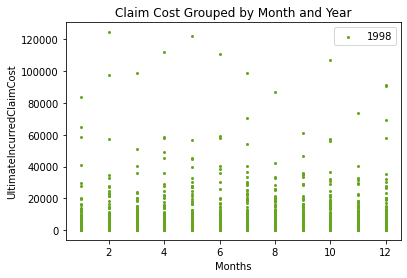

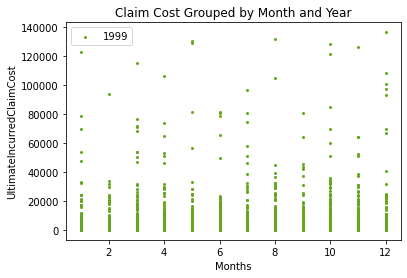

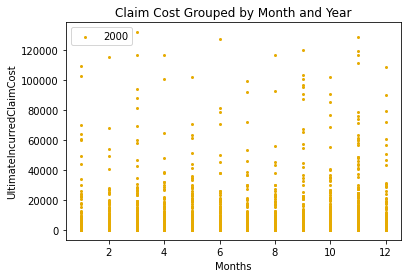

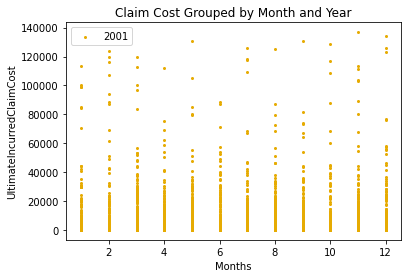

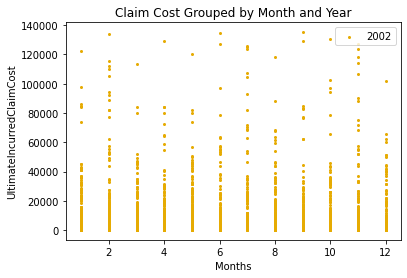

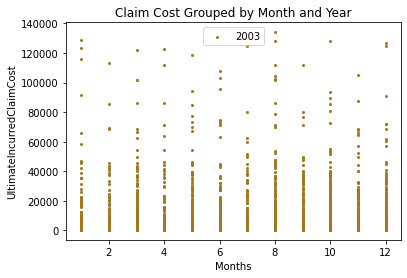

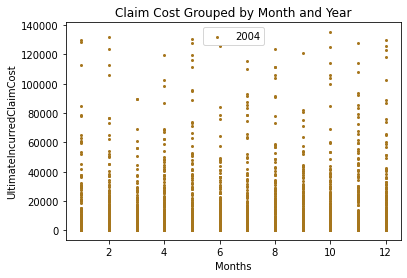

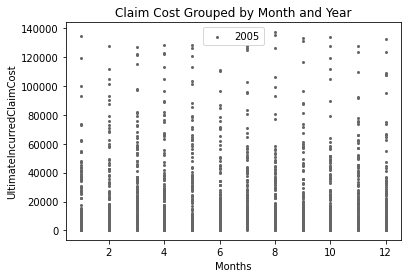

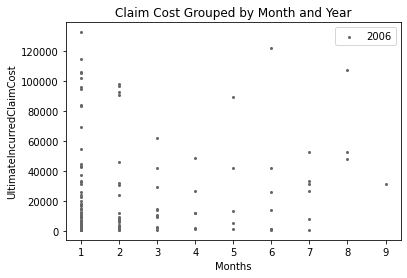

In [16]:
## Grouping Claim Cost
jet= plt.get_cmap('Dark2')
colors = iter(jet(np.linspace(0,1,20)))
for i in list(range(min(trainscaled['Year_Reported']),max(trainscaled['Year_Reported'])+1)):
    plt.scatter(x = 'Month_Reported', y='UltimateIncurredClaimCost', data = trainscaled[trainscaled['Year_Reported']==i],label=i, 
    color=next(colors),s=4)
    plt.xlabel("Months")
    plt.ylabel("UltimateIncurredClaimCost")
    plt.legend()
    plt.title("Claim Cost Grouped by Month and Year")
    plt.show()


Text(0.5, 1.0, 'Total Claim Cost by Year Reported')

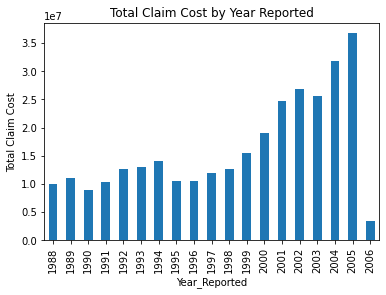

In [17]:
## Total Claim Cost By year reported
trainscaled.groupby('Year_Reported').UltimateIncurredClaimCost.sum().plot(kind='bar')  ## Total Claim Cost in a particular Year
plt.ylabel("Total Claim Cost")
plt.title("Total Claim Cost by Year Reported")

<AxesSubplot: xlabel='Year_Reported'>

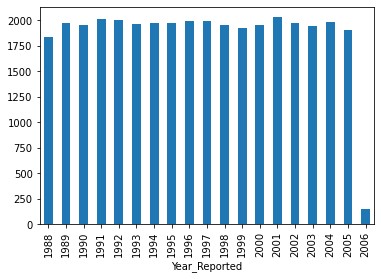

In [18]:
## Counting the Claim Numbers
trainscaled.groupby('Year_Reported').ClaimNumber.count().plot(kind='bar')

Year_Reported
1988    0.051637
1989    0.055693
1990    0.055102
1991    0.056820
1992    0.056454
1993    0.055186
1994    0.055693
1995    0.055552
1996    0.056257
1997    0.056059
1998    0.055158
1999    0.054116
2000    0.055017
2001    0.057158
2002    0.055609
2003    0.054792
2004    0.055806
2005    0.053778
2006    0.004113
Name: ClaimNumber, dtype: float64


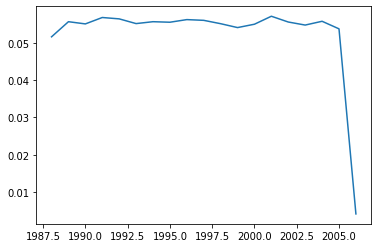

In [23]:
## Average Claim Per year
x=trainscaled.groupby('Year_Reported').ClaimNumber.count()/np.count_nonzero(trainscaled['ClaimNumber'])
plt.plot(x)
print(x)

Text(0.5, 1.0, 'Average Claim Cost by Year Reported')

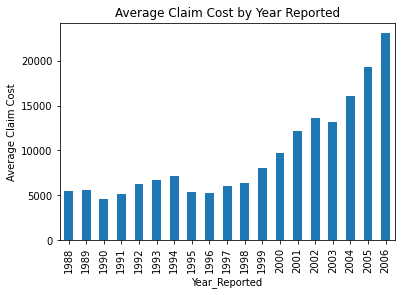

In [22]:
## Mean of claim cost by year
trainscaled.groupby('Year_Reported').UltimateIncurredClaimCost.mean().plot(kind='bar')    ## Average Claim Cost in a particular Year
plt.ylabel("Average Claim Cost")
plt.title("Average Claim Cost by Year Reported")

So What we observed here is that total sum of claims was highest in 2005 and lowest in 2006. However when we checked mean of claims we found that 2006 had the highest average claim cost. This reflects that 2006 have very les number of policies compared to previous years and hence distributing more starain per policy, which is also cross validated from dataset.

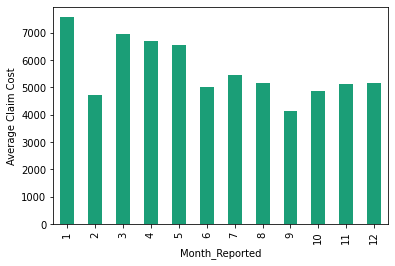

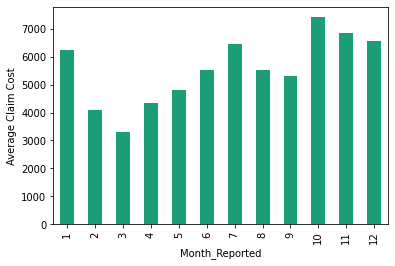

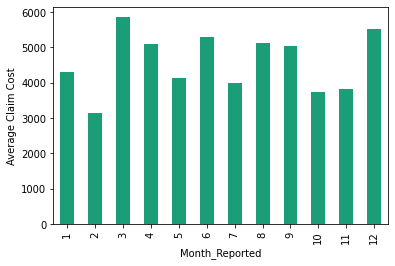

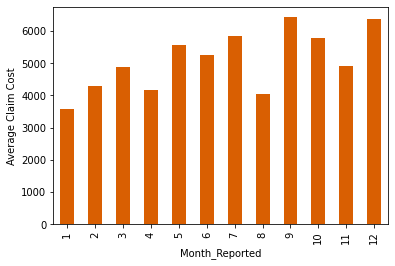

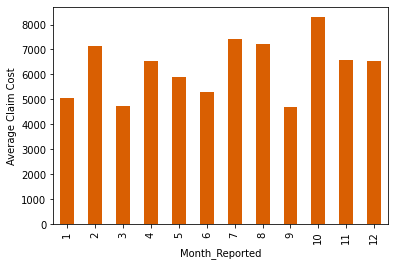

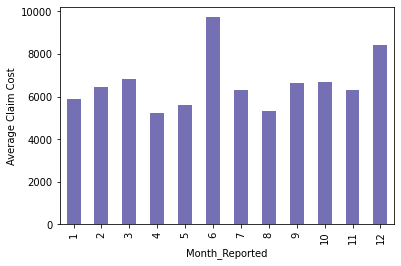

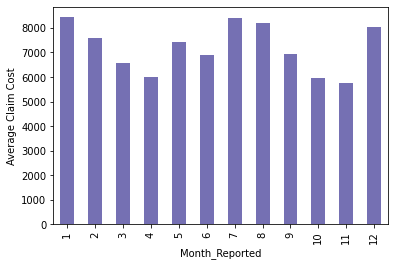

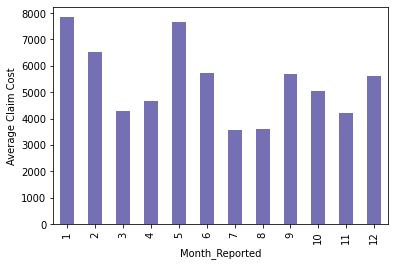

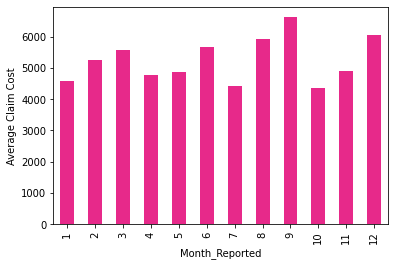

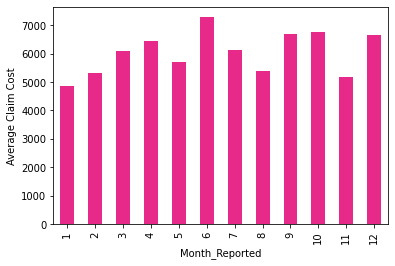

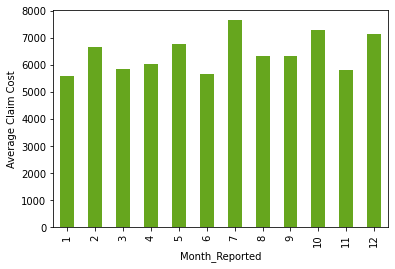

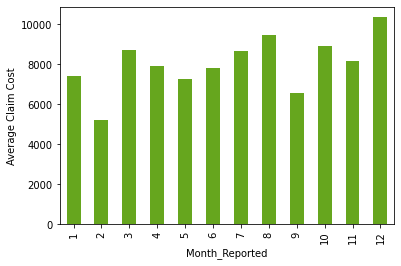

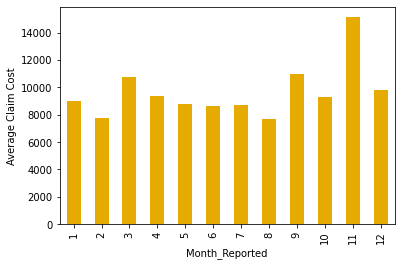

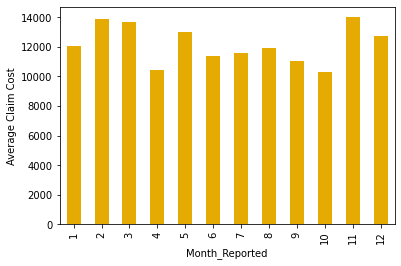

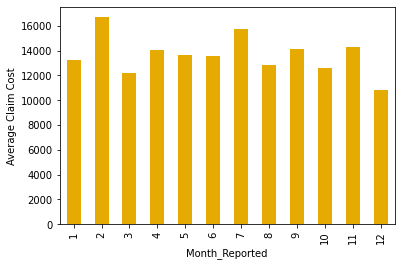

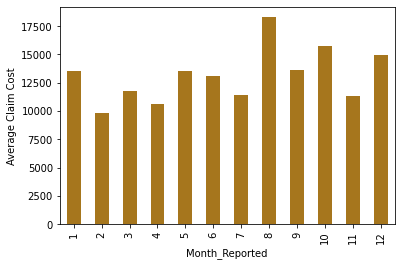

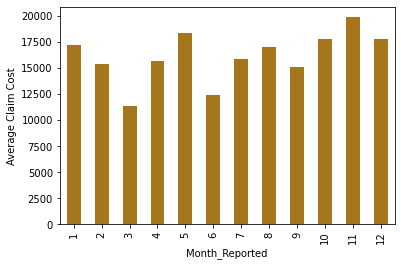

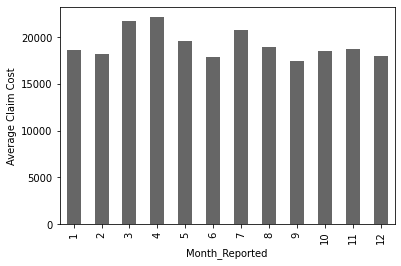

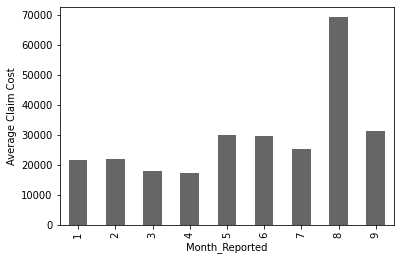

In [31]:
jet= plt.get_cmap('Dark2')       ## Average Claim Cost grouped by Month and Year
colors = iter(jet(np.linspace(0,1,20)))
for i in list(range(min(trainscaled['Year_Reported']),max(training['Year_Reported'])+1)):
    trainscaled[trainscaled['Year_Reported']==i].groupby('Month_Reported').UltimateIncurredClaimCost.mean().plot(kind='bar', color=next(colors), label = i)
    plt.ylabel("Average Claim Cost")
    # plt.ylim(2000,15000)
    plt.show()

Checking if we have duplicated i.e if same policyholder made a claim again.

In [32]:
## Checking if there are duplicates
len(trainscaled['ClaimNumber'])!=len(set(trainscaled['ClaimNumber']))

True

In [33]:
trainscaled.describe()

Day_Reported  Month_Reported  Year_Reported           Age  \
count  35498.000000    35498.000000   35498.000000  35498.000000   
mean      15.956110        6.597583    1996.547383     33.729928   
std        8.860606        3.394275       5.188046     12.109207   
min        1.000000        1.000000    1988.000000     13.000000   
25%        8.000000        4.000000    1992.000000     23.000000   
50%       16.000000        7.000000    1997.000000     32.000000   
75%       24.000000       10.000000    2001.000000     42.000000   
max       31.000000       12.000000    2006.000000     79.000000   

       DependentChildren  DependentsOther   WeeklyWages  HoursWorkedPerWeek  \
count       35498.000000     35498.000000  35498.000000        35498.000000   
mean            0.119359         0.009381    411.973121           37.238029   
std             0.519699         0.105605    233.780688            6.250084   
min             0.000000         0.000000      1.000000            0.000000   
25%             0.000000         0.000000    200.000000           38.000000   
50%             0.000000         0.000000    390.740000           38.000000   
75%             0.000000         0.000000    500.000000           40.000000   
max             8.000000         3.000000   6453.000000           60.000000   

       DaysWorkedPerWeek  InitialIncurredCalimsCost  UltimateIncurredClaimCost  
count       35498.000000               35498.000000               35498.000000  
mean            4.896980                7235.312722                8719.474731  
std             0.533421               15601.313688               16531.308140  
min             1.000000                   1.000000                 121.886805  
25%             5.000000                 660.000000                 908.096574  
50%             5.000000                2000.000000                3272.332193  
75%             5.000000                9000.000000                7906.009685  
max             7.000000              690000.000000              137241.120200

In [34]:
trainscaled.shape

(35498, 17)

In [12]:
## Changing the values type to numeric
trainscaled['Age'] = pd.to_numeric(trainscaled['Age']) 
trainscaled['DependentChildren'] = pd.to_numeric(trainscaled['DependentChildren'])
trainscaled['DependentsOther'] = pd.to_numeric(trainscaled['DependentsOther'])
trainscaled['WeeklyWages'] = pd.to_numeric(trainscaled['WeeklyWages'])
trainscaled['HoursWorkedPerWeek'] = pd.to_numeric(trainscaled['HoursWorkedPerWeek'])
trainscaled['DaysWorkedPerWeek'] = pd.to_numeric(trainscaled['DaysWorkedPerWeek'])
trainscaled['InitialIncurredCalimsCost'] = pd.to_numeric(trainscaled['InitialIncurredCalimsCost'])
trainscaled['UltimateIncurredClaimCost'] = pd.to_numeric(trainscaled['UltimateIncurredClaimCost'])

Specifying Predictors and Target

In [13]:
pred= trainscaled[['Age' , 'DaysWorkedPerWeek' , 'HoursWorkedPerWeek' , 'WeeklyWages' , 'DependentsOther' , 'DependentChildren', 'InitialIncurredCalimsCost']]
pred_c=trainscaled[['Age', 'DaysWorkedPerWeek' , 'HoursWorkedPerWeek' , 'WeeklyWages' , 'DependentsOther' , 'DependentChildren','MaritalStatus', 'PartTimeFullTime', 'InitialIncurredCalimsCost']]
targ=trainscaled['UltimateIncurredClaimCost']
targ_c= trainscaled['UltimateIncurredClaimCost']

In [14]:
## Changing the Categorical Variables to numeric using label encoder.
for x in pred_c.select_dtypes(include='object').columns:
    pred_c[x]=pr.LabelEncoder().fit_transform(pred_c[x])

C:\Users\asus\AppData\Local\Temp\ipykernel_6360\1682468800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_c[x]=pr.LabelEncoder().fit_transform(pred_c[x])


In [15]:
## Scaling
xx=pred_c.select_dtypes(exclude=[float,int]).columns
for i in xx :
    pred_c[str(i)]=pr.LabelEncoder().fit_transform(pred_c[str(i)])
predictors_c=pred_c.apply(pr.minmax_scale)

In [16]:
## Scaling
xx=pred.select_dtypes(exclude=[float,int]).columns
for i in xx :
    pred[str(i)]=pr.LabelEncoder().fit_transform(pred[str(i)])
predictors=pred.apply(pr.minmax_scale)

<AxesSubplot: xlabel='Age', ylabel='Density'>

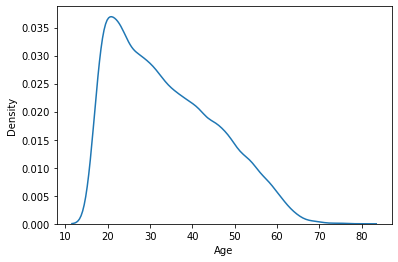

In [17]:
sns.kdeplot(data= trainscaled, x= "Age")
## Majority of People belongs to 20 to 50 years of Age group

<AxesSubplot: xlabel='DependentChildren', ylabel='Density'>

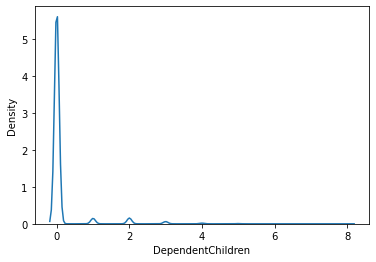

In [18]:
sns.kdeplot(data= trainscaled, x= "DependentChildren")
## Majority of policyholder have no children with few having 1 and 2 and very few having 3

<AxesSubplot: xlabel='DependentsOther', ylabel='Density'>

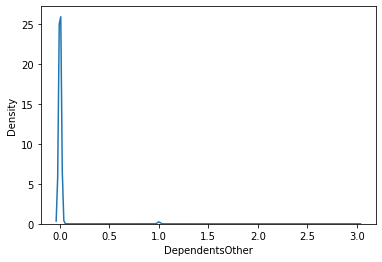

In [19]:
sns.kdeplot(data= trainscaled, x= "DependentsOther")
## It is clear that majority of the people have no dependents with few having 1

<AxesSubplot: xlabel='WeeklyWages', ylabel='Density'>

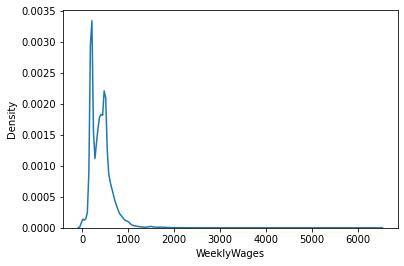

In [20]:
sns.kdeplot(data= trainscaled, x= "WeeklyWages")

<AxesSubplot: xlabel='UltimateIncurredClaimCost', ylabel='Density'>

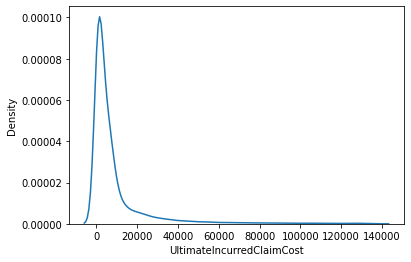

In [21]:
sns.kdeplot(data= trainscaled, x= "UltimateIncurredClaimCost")  ## What we have observed here that Claim Cost is positively skewed which is generally what happens
## since events at the tail are rare events and have very high cost.

<AxesSubplot: xlabel='DependentChildren', ylabel='count'>

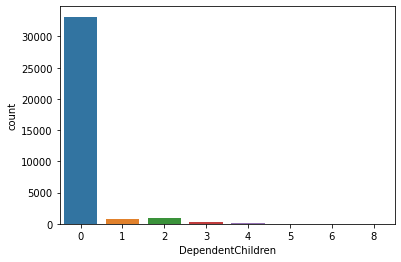

In [22]:
sns.countplot(x= 'DependentChildren', data= trainscaled)

<AxesSubplot: xlabel='DependentsOther', ylabel='count'>

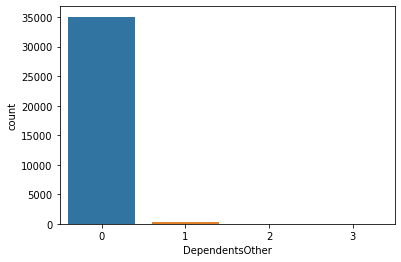

In [23]:
sns.countplot(x= 'DependentsOther', data= trainscaled)

<AxesSubplot: xlabel='Age', ylabel='count'>

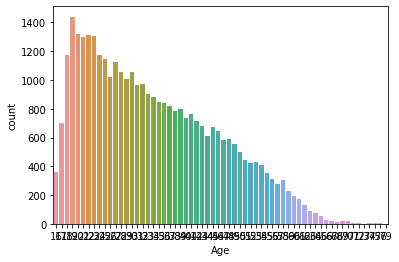

In [24]:
sns.countplot(x= 'Age', data= trainscaled)

Text(0.5, 1.0, 'Claim Cost Density by Marital Status')

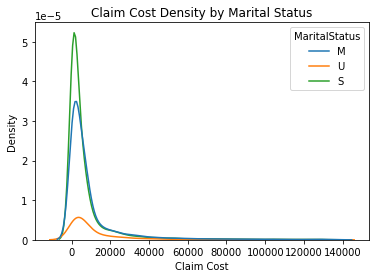

In [46]:
sns.kdeplot(data= trainscaled, x= "UltimateIncurredClaimCost", hue = "MaritalStatus")
plt.xlabel("Claim Cost")
plt.title("Claim Cost Density by Marital Status")

Text(0.5, 1.0, 'Claim Cost by Dependent Children')

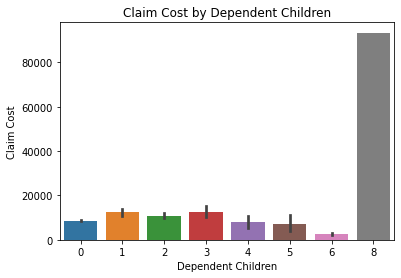

In [47]:
sns.barplot(x='DependentChildren',y='UltimateIncurredClaimCost',data=trainscaled)
plt.xlabel("Dependent Children")
plt.ylabel("Claim Cost")
plt.title("Claim Cost by Dependent Children")

Text(0.5, 1.0, 'Claim Cost by Dependent Others')

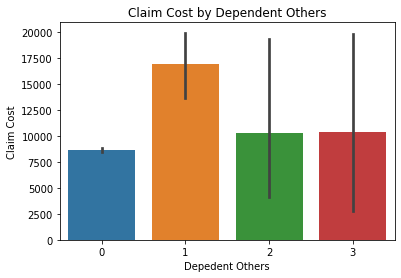

In [43]:
sns.barplot(x='DependentsOther',y='UltimateIncurredClaimCost',data=trainscaled)
plt.xlabel("Depedent Others")
plt.ylabel("Claim Cost")
plt.title("Claim Cost by Dependent Others")

Text(0.5, 1.0, 'Claim Cost by Days Worked')

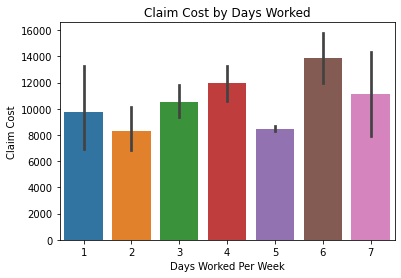

In [42]:
sns.barplot(x='DaysWorkedPerWeek',y='UltimateIncurredClaimCost',data=trainscaled)
plt.xlabel("Days Worked Per Week")
plt.ylabel("Claim Cost")
plt.title("Claim Cost by Days Worked")

In [30]:
trainscaled['Age_Bin']=pd.cut(trainscaled['Age'],bins=[1,25,50,80] , labels=['Young','Middle-Age','Old'])
trainscaled['Age_Bin']

0        Middle-Age
1        Middle-Age
2        Middle-Age
3        Middle-Age
4        Middle-Age
            ...    
36170         Young
36171         Young
36173           Old
36174    Middle-Age
36175    Middle-Age
Name: Age_Bin, Length: 35372, dtype: category
Categories (3, object): ['Young' < 'Middle-Age' < 'Old']

In [31]:
trainscaled['WeeklyWages_Bin']=pd.cut(trainscaled['WeeklyWages'],bins=[0,200,800,1600,8000] , labels=['Low','Average Wage','Above Average','High'])
trainscaled['WeeklyWages_Bin']

0        Average Wage
1        Average Wage
2        Average Wage
3        Average Wage
4        Average Wage
             ...     
36170    Average Wage
36171    Average Wage
36173    Average Wage
36174    Average Wage
36175             Low
Name: WeeklyWages_Bin, Length: 35372, dtype: category
Categories (4, object): ['Low' < 'Average Wage' < 'Above Average' < 'High']

Text(0.5, 0, 'Age Group')

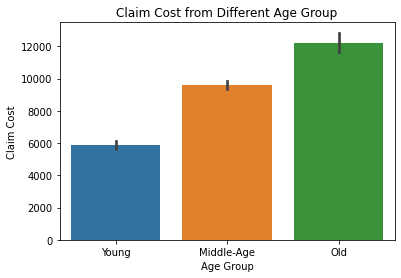

In [39]:
sns.barplot(x='Age_Bin',y='UltimateIncurredClaimCost',data=trainscaled)
plt.title("Claim Cost from Different Age Group")
plt.ylabel("Claim Cost")
plt.xlabel("Age Group")

Text(0.5, 1.0, 'Claim Cost from Different Wage Group')

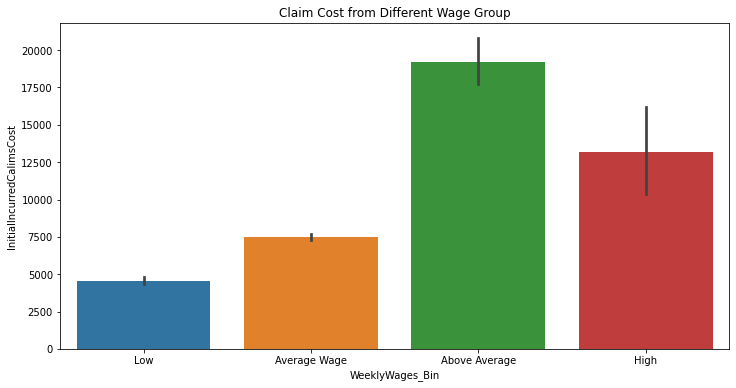

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x='WeeklyWages_Bin',y='InitialIncurredCalimsCost',data=trainscaled)
plt.title("Claim Cost from Different Wage Group")

Text(0.5, 0, 'Wage Group')

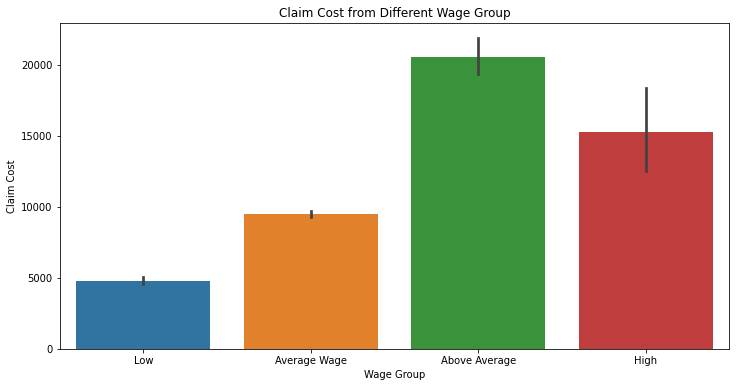

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x='WeeklyWages_Bin',y='UltimateIncurredClaimCost',data=trainscaled)
plt.title("Claim Cost from Different Wage Group")
plt.ylabel("Claim Cost")
plt.xlabel("Wage Group")

In [ ]:
sns.countplot(data= trainscaled, y= "ClaimNumber", hue= "MaritalStatus")

In [ ]:
sns.kdeplot(data= trainscaled, x= "UltimateIncurredClaimCost", hue = "MaritalStatus")

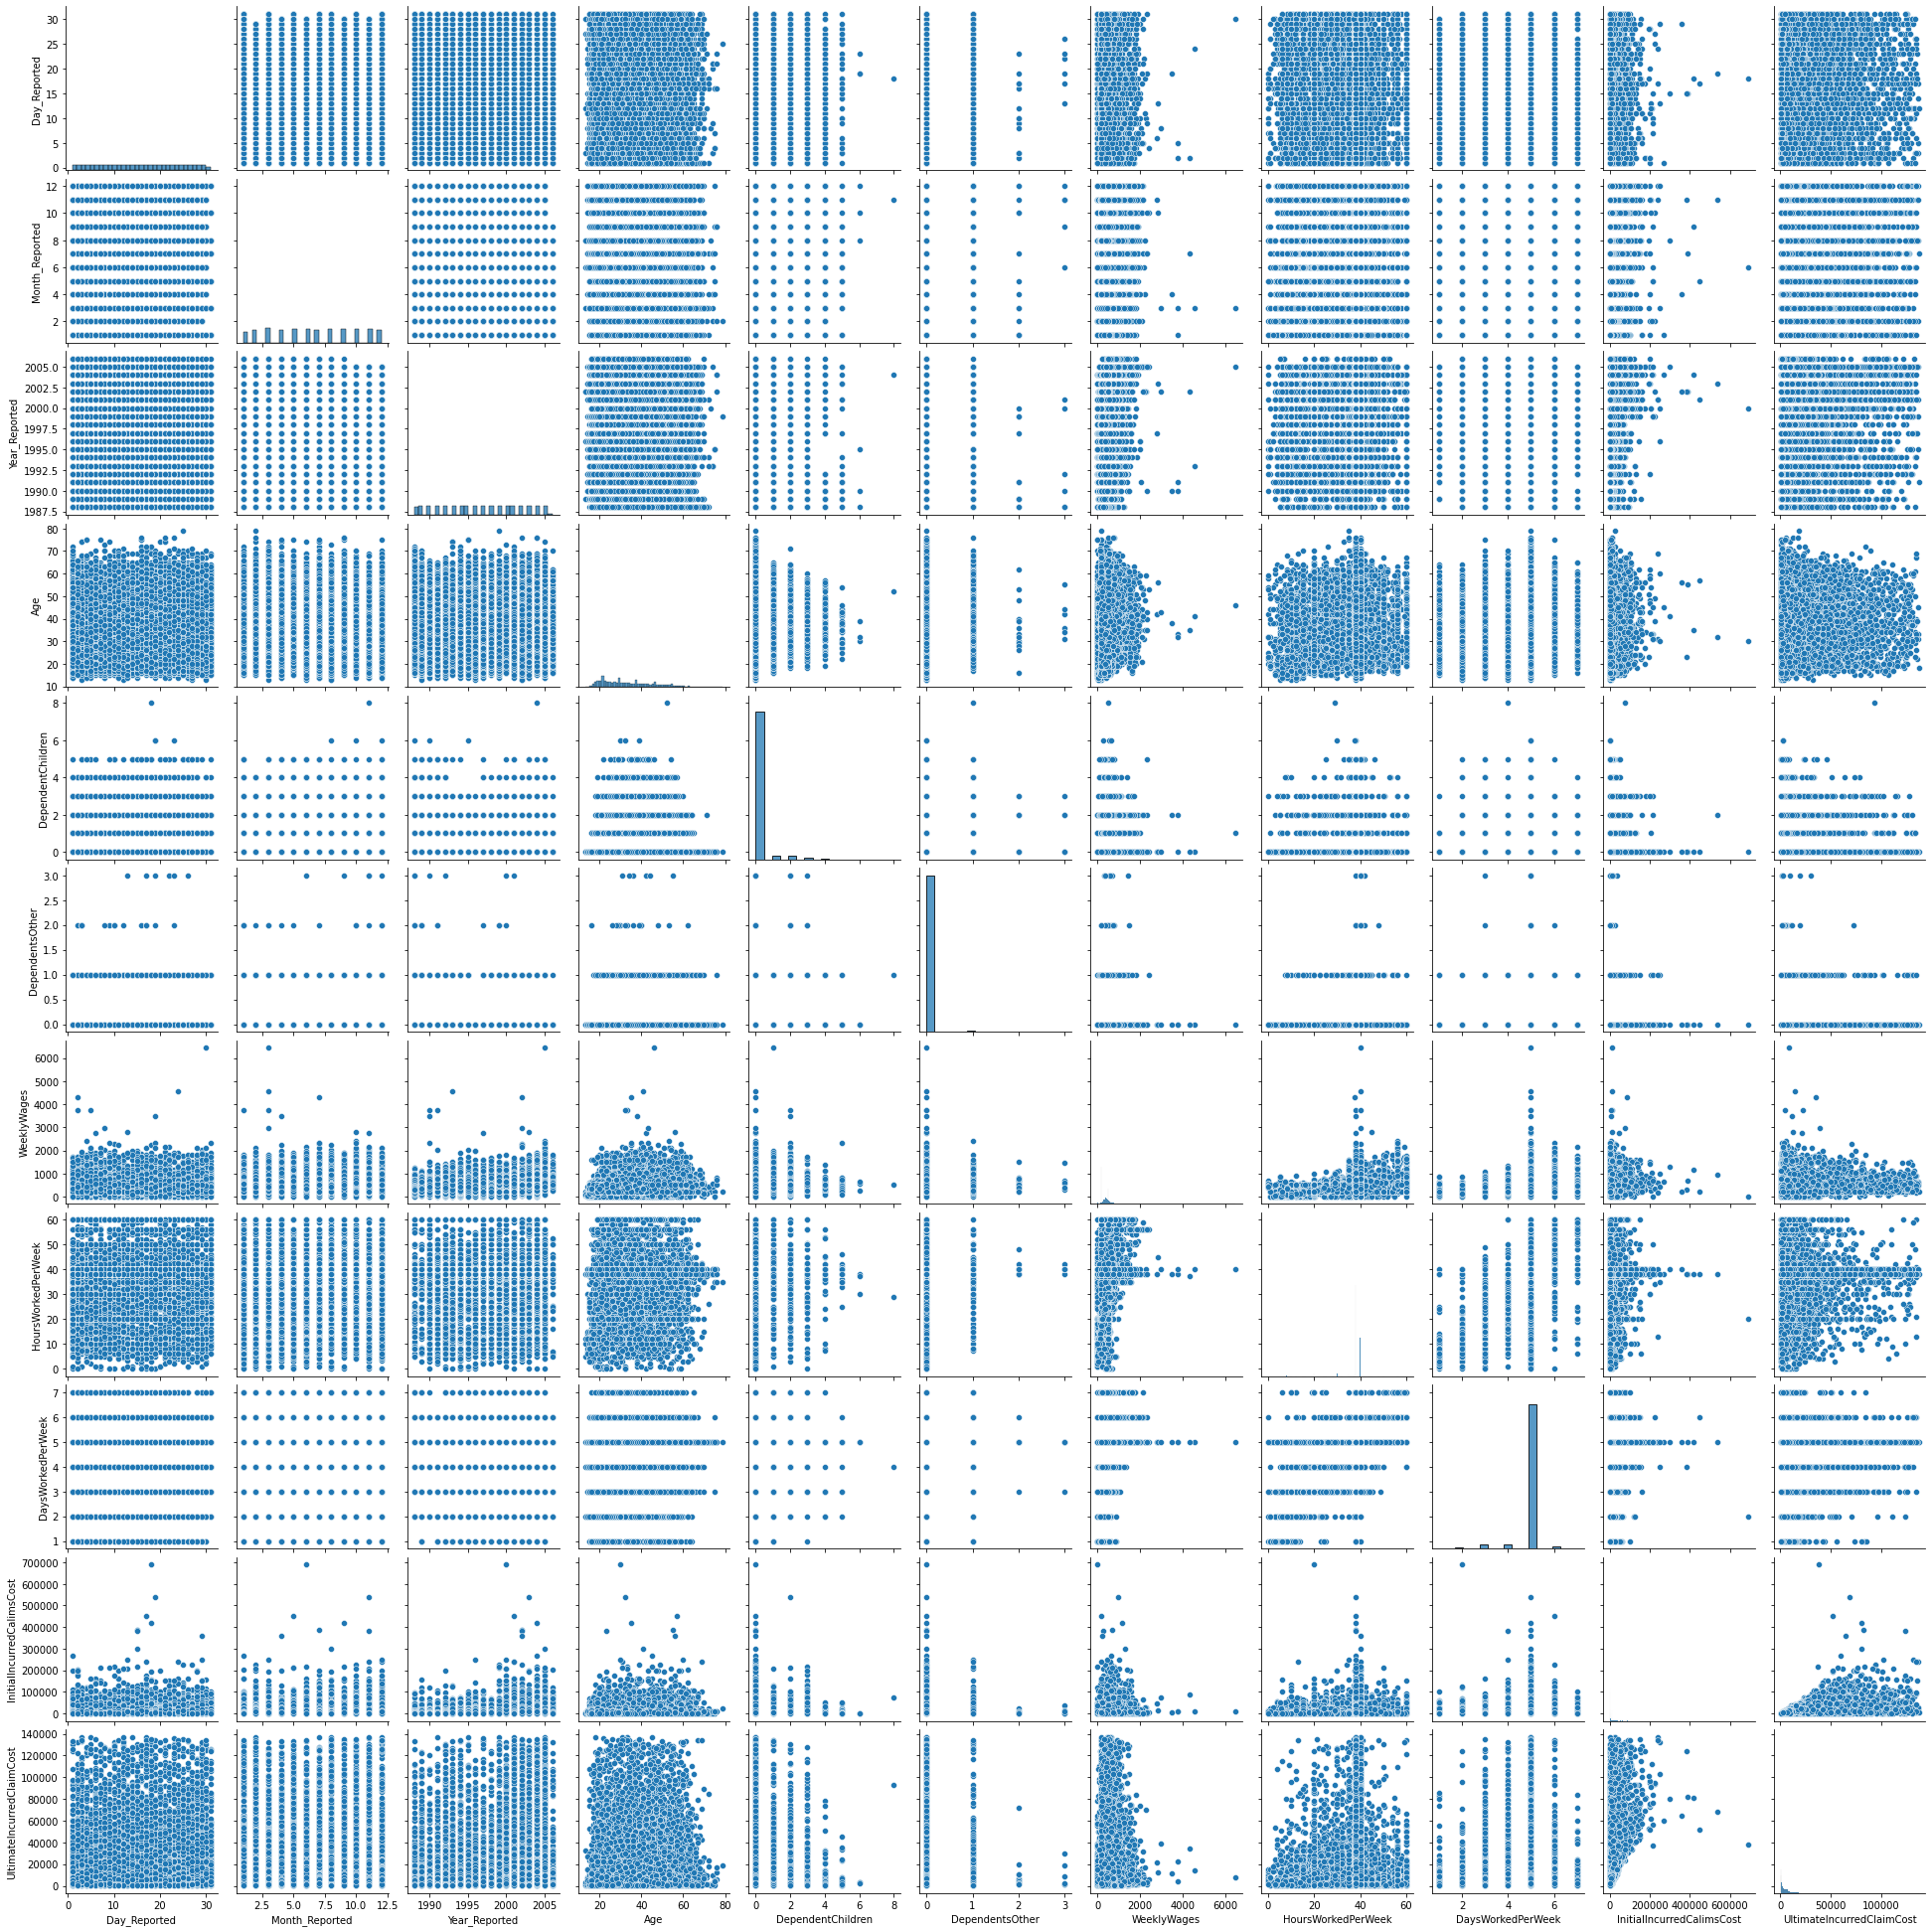

In [48]:
sns.pairplot(trainscaled)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


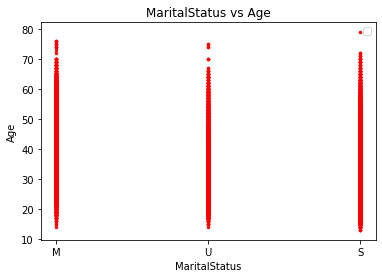

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


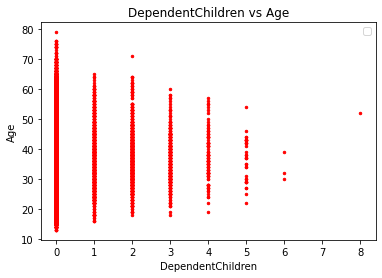

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


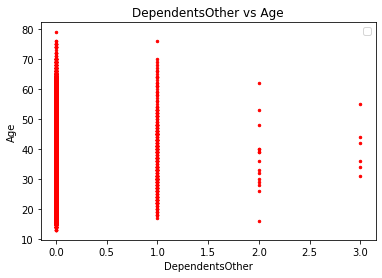

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


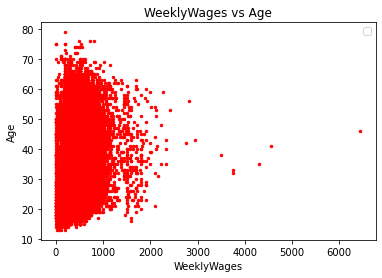

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


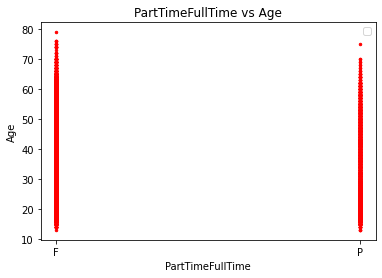

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


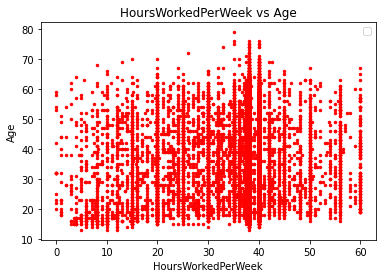

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


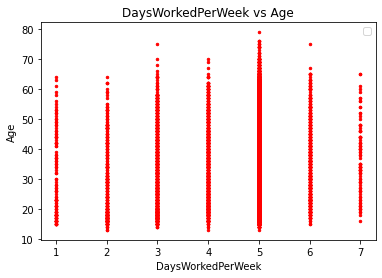

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


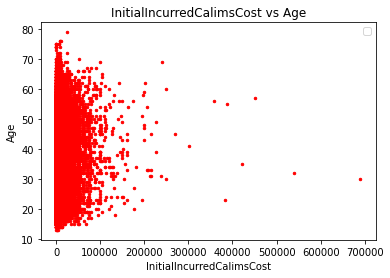

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


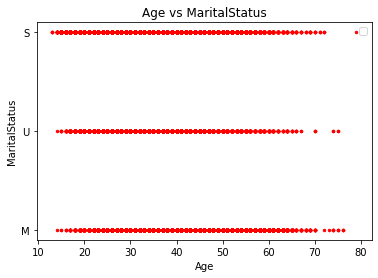

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


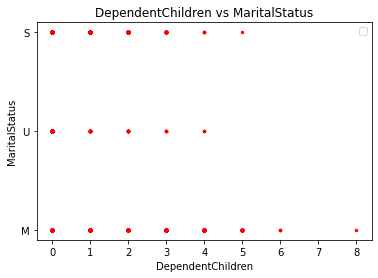

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


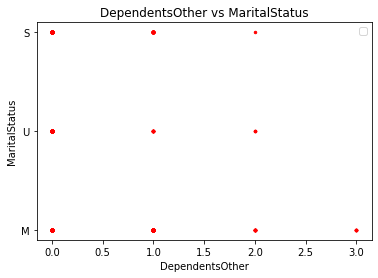

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


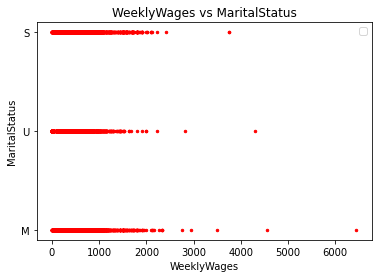

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


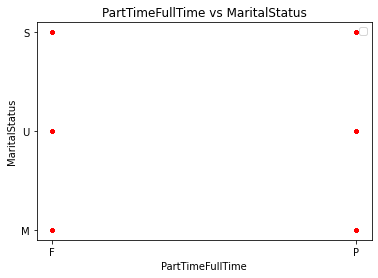

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


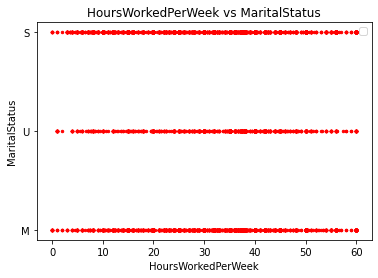

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


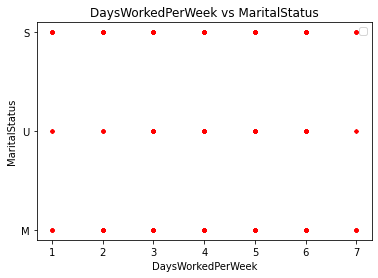

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


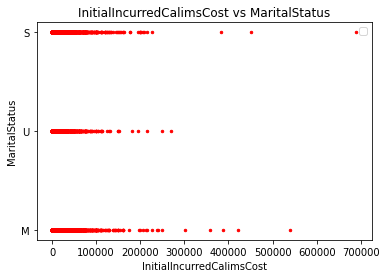

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


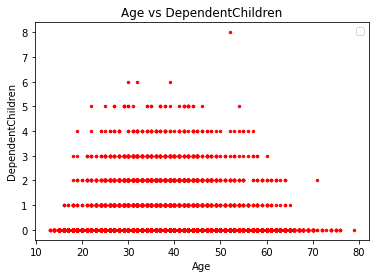

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


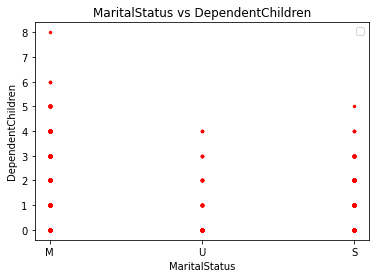

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


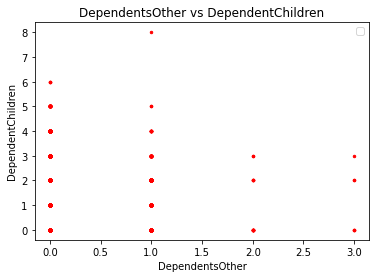

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


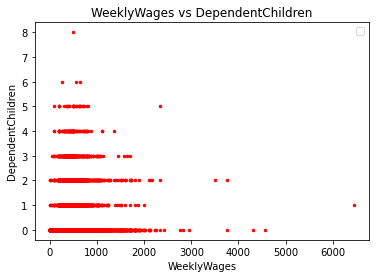

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


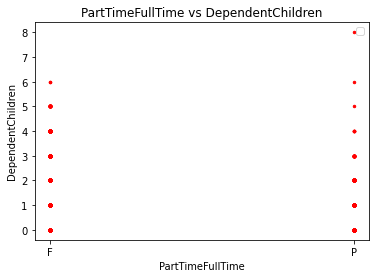

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


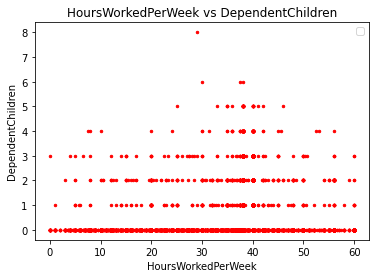

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


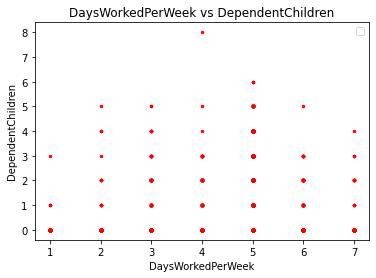

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


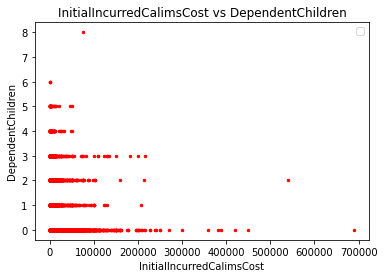

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


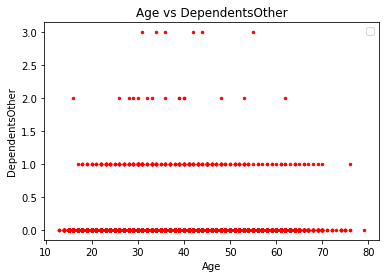

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


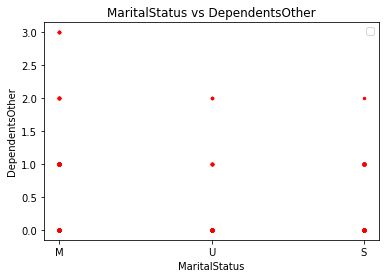

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


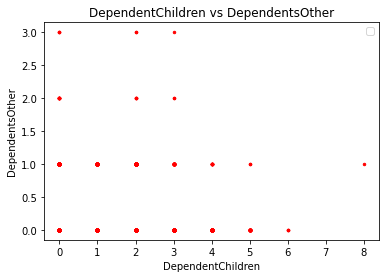

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


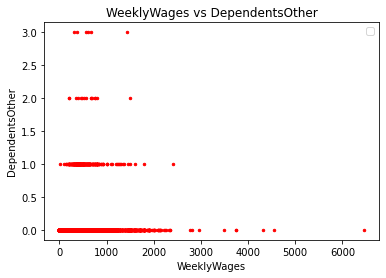

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


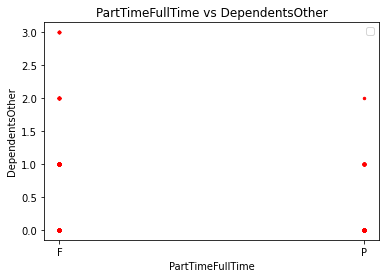

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


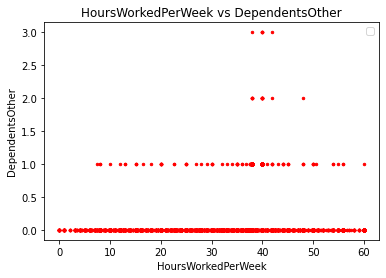

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


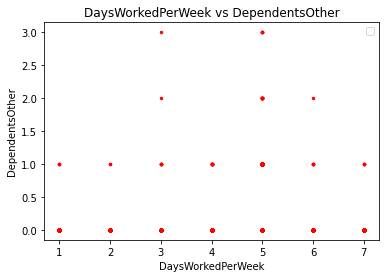

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


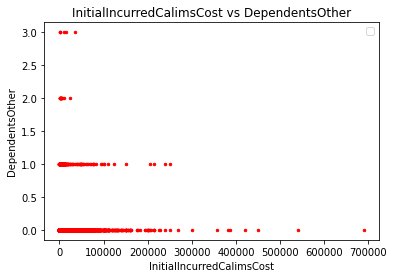

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


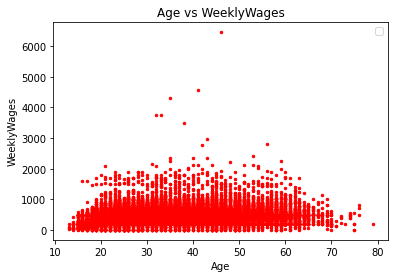

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


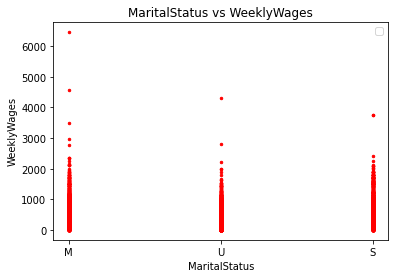

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


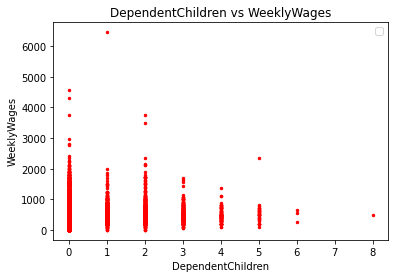

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


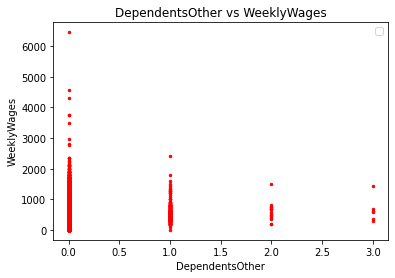

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


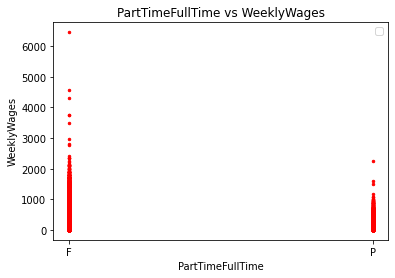

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


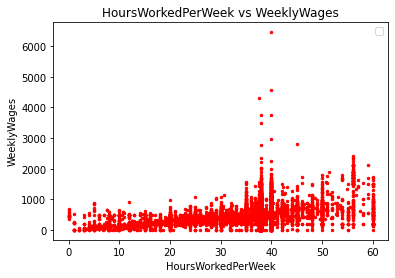

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


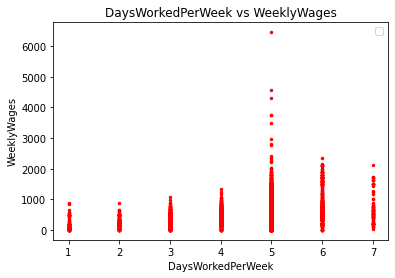

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


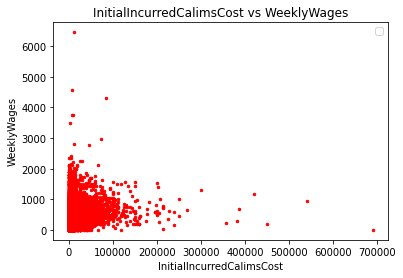

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


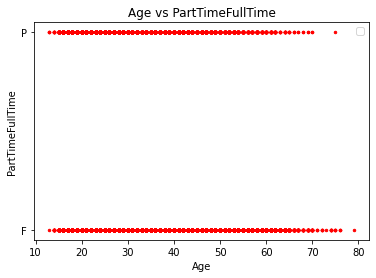

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


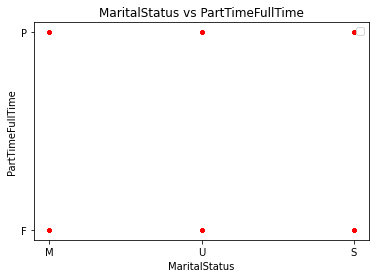

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


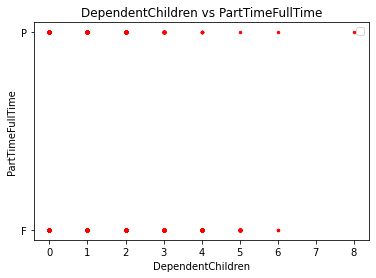

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


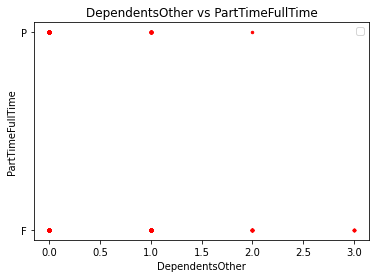

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


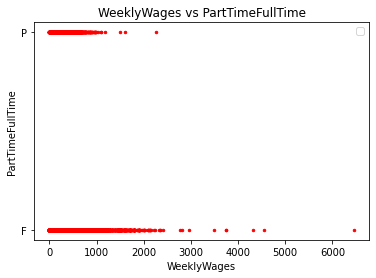

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


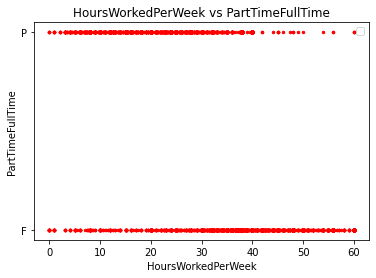

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


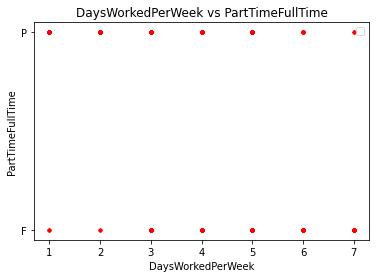

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


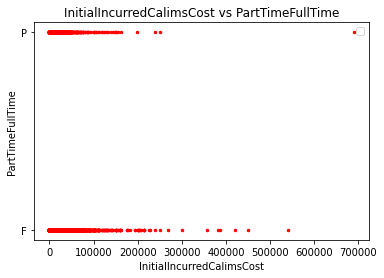

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


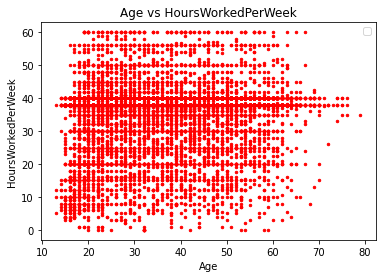

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


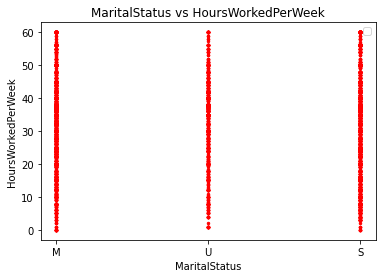

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


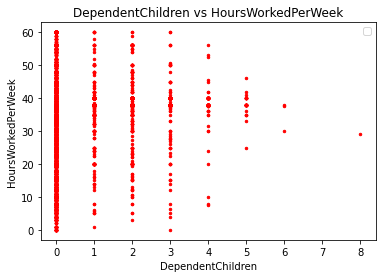

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


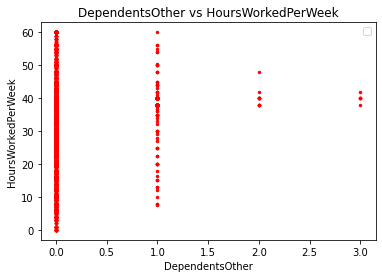

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


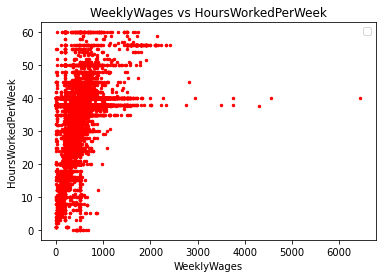

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


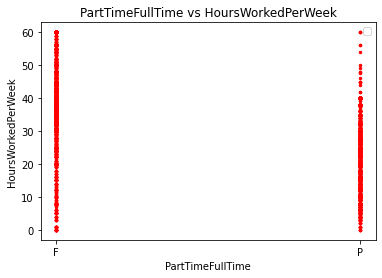

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


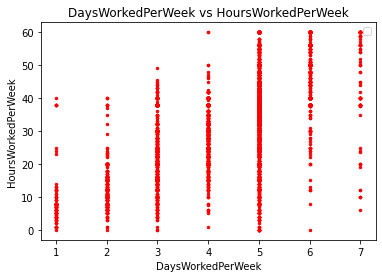

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


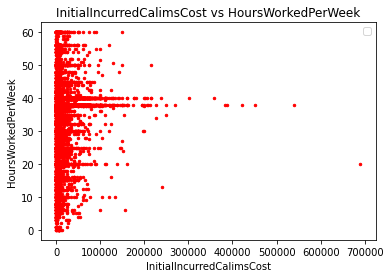

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


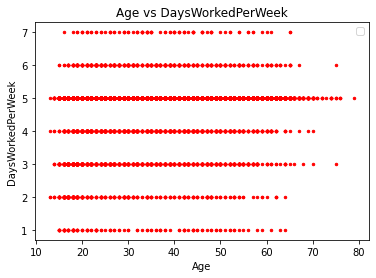

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


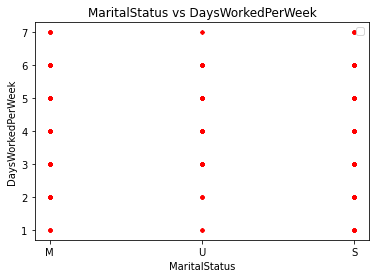

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


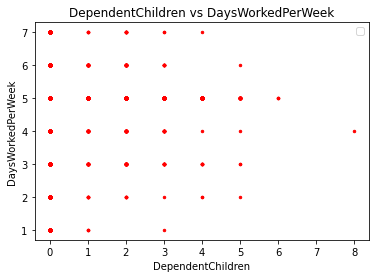

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


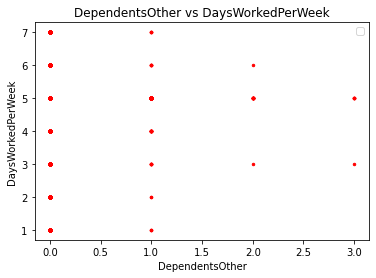

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


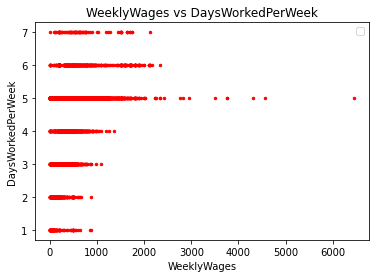

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


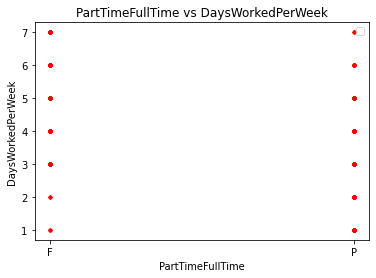

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


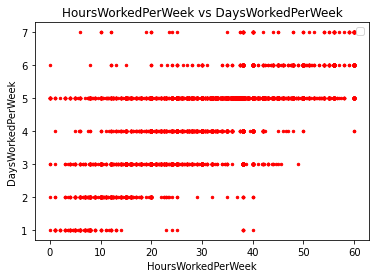

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


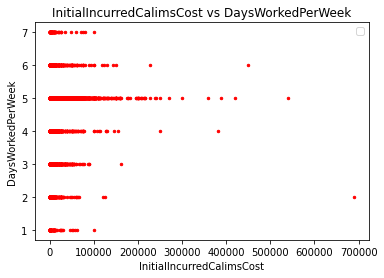

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


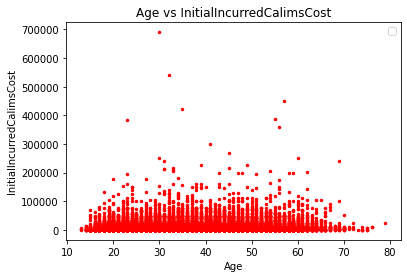

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


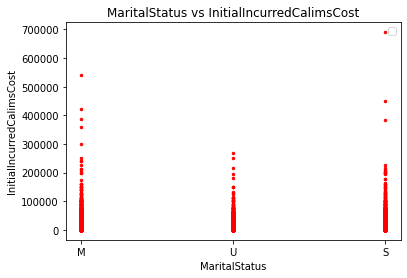

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


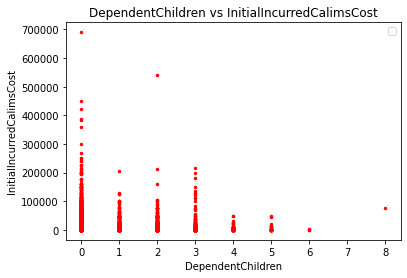

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


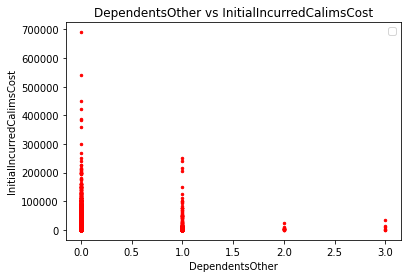

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


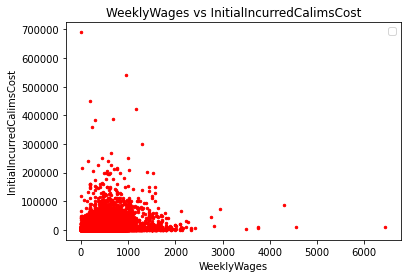

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


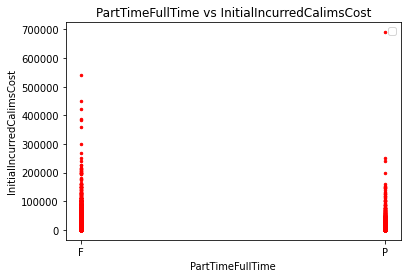

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


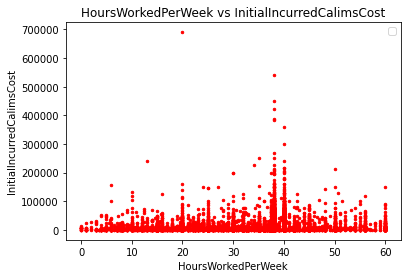

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


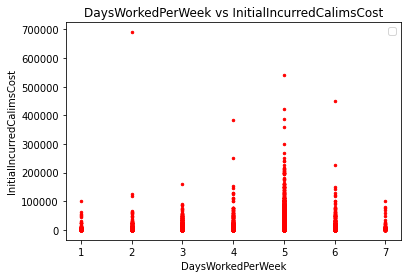

In [50]:
## Scatter Plots
y_columns = ["Age", "MaritalStatus", "DependentChildren", "DependentsOther", "WeeklyWages", "PartTimeFullTime", "HoursWorkedPerWeek", "DaysWorkedPerWeek", "InitialIncurredCalimsCost"]
x_columns = ["Age", "MaritalStatus", "DependentChildren", "DependentsOther", "WeeklyWages", "PartTimeFullTime", "HoursWorkedPerWeek", "DaysWorkedPerWeek", "InitialIncurredCalimsCost"]
for y_col in y_columns:
    for x_col in x_columns:
        if x_col != y_col:
            figure = plt.figure
            ax = plt.gca()
            ax.scatter(trainscaled[x_col],trainscaled[y_col], color= 'r', s= 6)
            ax.set_xlabel(x_col)
            ax.set_ylabel(y_col)
            ax.set_title("{} vs {}".format(x_col, y_col))
            plt.legend()
            plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


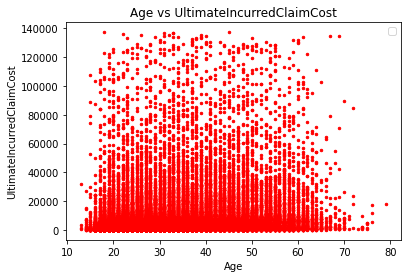

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


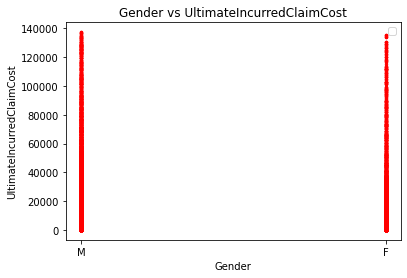

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


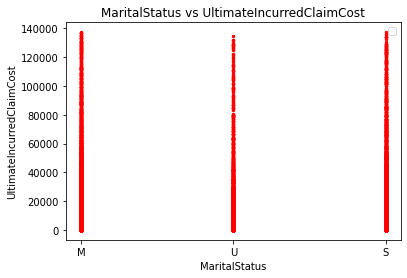

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


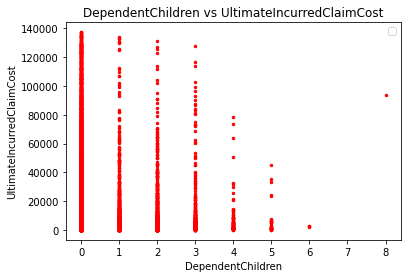

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


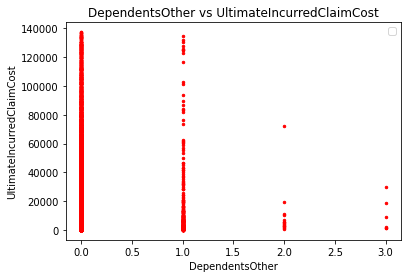

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


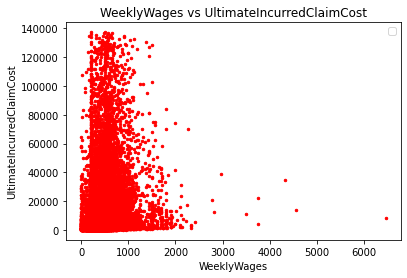

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


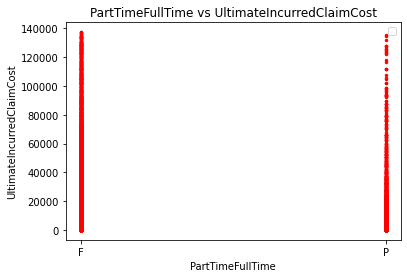

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


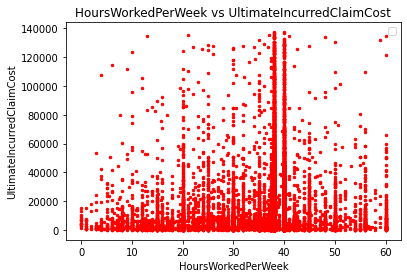

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


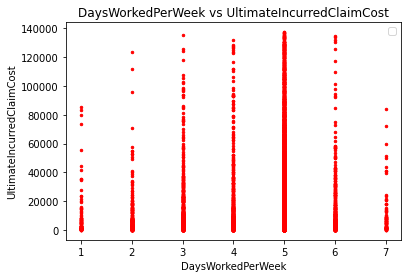

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


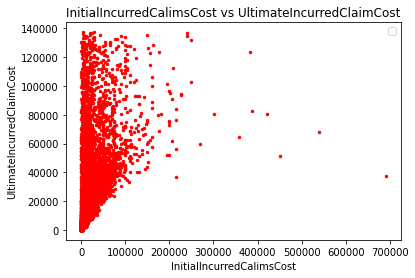

In [51]:
## Scatter Plot for the comparison with Claim Cost
y_col = "UltimateIncurredClaimCost"
x_columns = ["Age", "Gender", "MaritalStatus", "DependentChildren", "DependentsOther", "WeeklyWages", "PartTimeFullTime", "HoursWorkedPerWeek", "DaysWorkedPerWeek", "InitialIncurredCalimsCost"]
for x_col in x_columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(trainscaled[x_col],trainscaled[y_col],c= 'r', s= 6)
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))
    plt.legend()
    plt.show()

In [54]:
## Checking the Skewness and Kurtosis
i= ["Age", "DependentChildren", "DependentsOther", "WeeklyWages", "HoursWorkedPerWeek", "DaysWorkedPerWeek", "InitialIncurredCalimsCost", "UltimateIncurredClaimCost"]
for j in i:
    print("Skewness: %f" % trainscaled[j].skew())
    print("Kurtosis: %f" % trainscaled[j].kurt())


Skewness: 0.548225
Kurtosis: -0.593572
Skewness: 5.118135
Kurtosis: 29.675346
Skewness: 13.296062
Kurtosis: 221.260155
Skewness: 2.715189
Kurtosis: 27.475220
Skewness: -2.385854
Kurtosis: 10.030736
Skewness: -3.829797
Kurtosis: 19.913022
Skewness: 10.234650
Kurtosis: 239.406693
Skewness: 4.048539
Kurtosis: 19.619171


Comments
1) At the early ages we see some high amounts claims, this could be because of the inexpereince in the driving for say.
2) In the middle age there are some outliers which needs to be investigated.
3) There are more and high claim from Married people.
4) There are more and high claims from people with lesse dependent children and others

<AxesSubplot: >

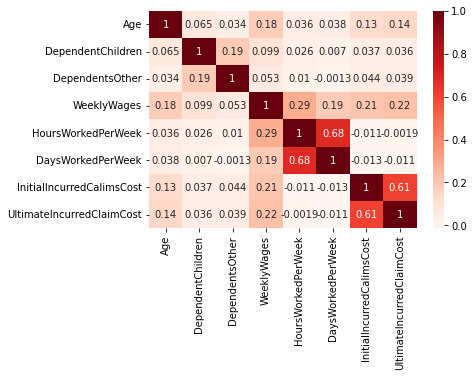

In [55]:
## Correlation Without the Categorical Variables
sns.heatmap(trainscaled[["Age", "DependentChildren", "DependentsOther", "WeeklyWages", "HoursWorkedPerWeek", "DaysWorkedPerWeek", "InitialIncurredCalimsCost", "UltimateIncurredClaimCost"]].corr(), annot= True, cmap= 'Reds')

Text(0.5, 1.0, 'Correlation Between Variables')

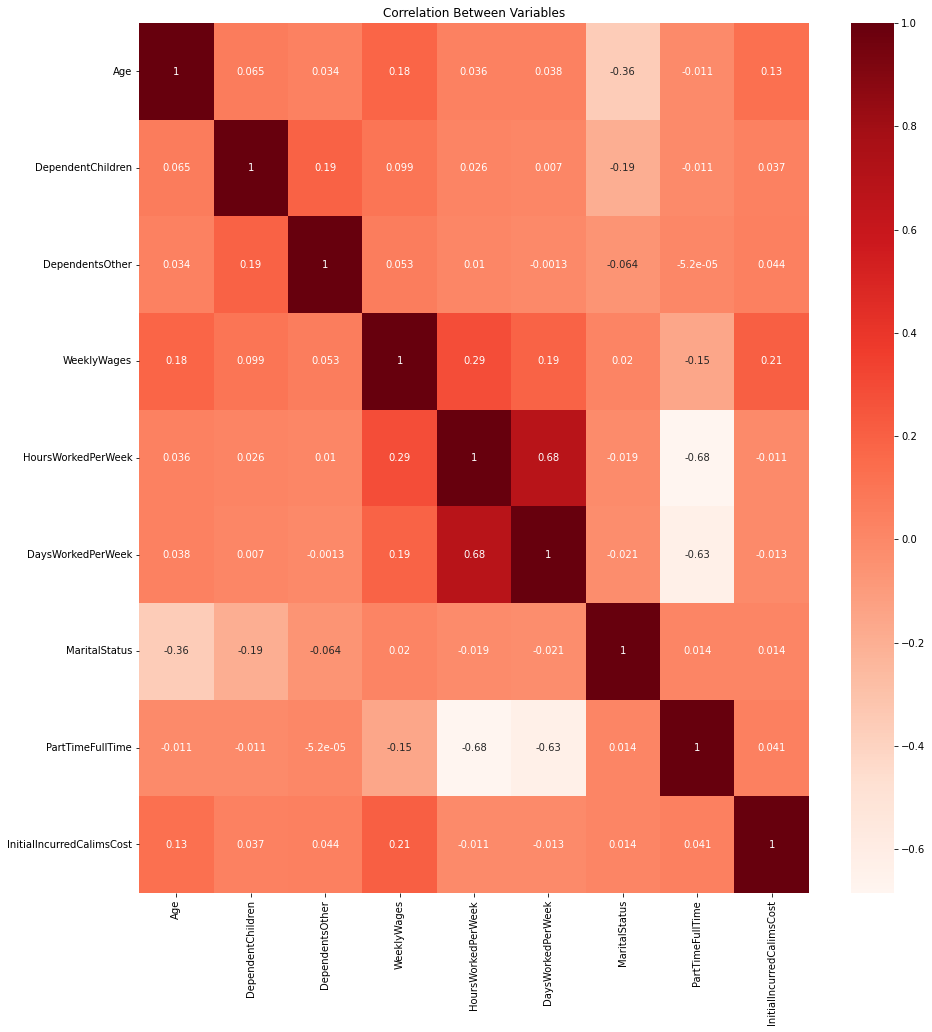

In [58]:
## Correlation with the Categorical Variables
plt.figure(figsize=(15, 16))
sns.heatmap(predictors_c[["Age", "DependentChildren", "DependentsOther", "WeeklyWages", "HoursWorkedPerWeek", "DaysWorkedPerWeek", 
"MaritalStatus", "PartTimeFullTime", "InitialIncurredCalimsCost"]].corr(), annot= True, cmap= 'Reds')
plt.title("Correlation Between Variables")

MULTICOLLINEARITY

The idea is to check if the predictors are correlated or not, since if the independent variables i.e. predictors are correlated it can cause problesm in fitting the model. The goal of the regression analysis is check/understand the relationship between predictors and target in sylows. So, higher the correlation between predictors the change in one variable can impact change in another variables.

In [59]:
vif_data=pd.DataFrame()
vif_data["feature"] = predictors_c.columns
vif_data["VIF"] = [variance_inflation_factor(predictors_c.values, i)
                          for i in range(len(predictors_c.columns))]
print(vif_data)

                     feature        VIF
0                        Age   4.622650
1          DaysWorkedPerWeek  72.364592
2         HoursWorkedPerWeek  73.848383
3                WeeklyWages   4.872404
4            DependentsOther   1.049463
5          DependentChildren   1.140678
6              MaritalStatus   2.479548
7           PartTimeFullTime   1.166809
8  InitialIncurredCalimsCost   1.293347


There  exist collinearity among the predictos.

PRINCIPAL COMPONENET ANALYSIS

In [ ]:
pca=PCA()
prin_comp= pca.fit_transform(predictors)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
np.multiply(pca.explained_variance_ratio_,pca.explained_variance_)



The PCA transformation is unsupervised, meaning that it does not consider the target variable when determining principal components. Hence, there is no guarantee that the principal components with the largest variance will be the best ones for predicting the target. There is a chance that the directions with high predictive power but low variance are omitted, resulting in poor model performance.


Dividing the Data into training and testing datasets

In [48]:
from sklearn.model_selection import train_test_split
predictors,predictors_test,target,target_test= train_test_split(pred,targ, test_size=0.3,random_state=8544)

In [49]:
from sklearn.model_selection import train_test_split
predictors_c,predictors_test_c,target_c,target_test_c= train_test_split(pred_c,targ_c, test_size=0.3,random_state=8544)

_________________________________Linear Regression_____________________________________________

Without Categorical Variables

In [ ]:
## Making Different Combination of Predictors
t_columns=["Age" , "DaysWorkedPerWeek" , "HoursWorkedPerWeek" , "WeeklyWages" , "DependentsOther" , "DependentChildren", 'InitialIncurredCalimsCost']
def subsets(numbers):
    if numbers == []:
        return [[]]
    x = subsets(numbers[1:])
    return x + [[numbers[0]] + y for y in x]
 
# wrapper function
def subsets_of_given_size(numbers, n):
    return [x for x in subsets(numbers) if len(x)==n]
    print(subsets_of_given_size(numbers, n))

t_sub=subsets(t_columns)
len(t_sub)
t_sub=t_sub[1:]

In [ ]:
## Running Linear Regression for Different Permutation of Predictors
rsqr_adj= []
aic= []
bic= []

for i in range(len(t_sub)):
    p= predictors[t_sub[i]]
    lrmodel=sm.OLS(target,p)
    fitted_model=lrmodel.fit()
    a= fitted_model.rsquared_adj
    b= fitted_model.aic
    c= fitted_model.bic
    rsqr_adj.append(a)
    aic.append(b)
    bic.append(c)

In [ ]:
## Adjusted R Square to check the proportion of variance explained
plt.plot(rsqr_adj)
plt.title('Adjusted R Square for Different Permuattions of Variables(Without Categorical Variables)')
plt.ylabel('Adj R Square')
plt.title("Adjusted R Square for Different permutations of Variables (Without Categorical Variables)")



In [ ]:
## AIC
plt.plot(aic)
plt.title('AIC for Different Permutations of Variables(Without Categorical Varibles)')
plt.ylabel('AIC')

In [ ]:
## First Difference of AIC
aic_diff= np.diff(aic)
plt.plot(aic_diff)

In [ ]:
## BIC
plt.plot(bic)
plt.title('BIC for Different Permutations of Variables(Without Categorical Varibles)')
plt.ylabel('BIC')

In [ ]:
## First Difference of BIC
bic_diff= np.diff(bic)
plt.plot(bic_diff)

R square statistic explains the proportion of variance explained by the model. So, if the value is closr to 1 the better it is.
Another statistic is Residual standard error, this explains the proportion of variance unexplained by the model. R square is also equls to TSS- RSS

It is observed that the variablty explained using the linear regrssion is approximately 19% if we take all the variabes, which is not very high. Therefore, this means that our data has more complex structure and may require use of categorical variables or even another method.

So as long as we keep on adding predictors to the model, we will observe that adjusted r square will keep on increasing. Therefore, need to check for increase in r square when one more variable is added.

We have listed the variables that takes upto the max r square.


Full Scale Model Without Categorical Variables

In [ ]:
## Full Scale Linear Regression Model Without the Categorical Variables 
lrmodel1=sm.OLS(target, predictors)
fitted_model=lrmodel1.fit()
print(fitted_model.summary())

Training Error

In [ ]:
y_pred = fitted_model.predict(predictors) ## Making Predictions

In [ ]:
mean_squared_error(target,y_pred, squared= False)

In [ ]:
mean_squared_error(target,y_pred, squared= True)

In [ ]:
r2_score(target,y_pred)

In [ ]:
## Comparison of Actual and Predicted Values for Training Data
plt.scatter(y_pred, target, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Linear Regression Model Without Categorical Variables')
plt.show()

TEST DATA

In [ ]:
y_pred_tst = fitted_model.predict(predictors_test) ## Making Predictions

In [ ]:
mean_squared_error(target_test,y_pred_tst, squared= False)

In [ ]:
mean_squared_error(target_test,y_pred_tst, squared= True)

In [ ]:
r2_score(target_test, y_pred_tst)

In [ ]:
## Comparison of Actual and Predicted Values for Testing Data
plt.scatter(y_pred_tst, target_test, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Linear Regression Model Without Categorical Variables')
plt.show()

LINEAR REGRESSION WITH CATEGORICAL VARIABLES

In [ ]:
## Different Combination of Predictors, Gender as predictor has been removed to make the model EU complaint
t_columns= ['Age', 'DaysWorkedPerWeek',
       'HoursWorkedPerWeek', 'WeeklyWages', 'DependentsOther',
       'DependentChildren', 'MaritalStatus', 'PartTimeFullTime', 'InitialIncurredCalimsCost']
t_sub_c=subsets(t_columns)

t_sub_c=t_sub_c[1:]


In [ ]:
## fitting the model for different combinations
rsqr_adj_c=[]
aic_c= []
bic_c= []
for i in range(len(t_sub_c)):
    p=predictors_c[t_sub_c[i]]
    lrmodel=sm.OLS(target_c,p)
    fitted_model=lrmodel.fit()
    a= fitted_model.rsquared_adj
    b= fitted_model.aic
    c= fitted_model.bic
    rsqr_adj_c.append(a)
    aic_c.append(b)
    bic_c.append(c)


In [ ]:
## Adjusted R Square for different combination of predictors including the categorical ones
plt.plot(rsqr_adj_c)
plt.title('Adjusted R Square for Differnet Pemuatations of Variables(With Categorical Variables)')
plt.ylabel('Adj. R Square')

In [ ]:
rsqr_adj_c_diff=np.diff(rsqr_adj_c)
plt.plot(rsqr_adj_c_diff)

Working on final full scale model

In [50]:
## Full Scale Model
lrmodel2_c=sm.OLS(target_c,predictors_c)
fitted_model_c=lrmodel2_c.fit()

Training Error

In [51]:
## Making Predictions
y_pred_c = fitted_model_c.predict(predictors_c)

In [52]:
mean_squared_error(target_c,y_pred_c, squared = False)

13082.60060929291

In [53]:
mean_squared_error(target_c,y_pred_c, squared = True)

171154438.70227122

In [54]:
r2_score(target_c,y_pred_c)

0.36868982750801094

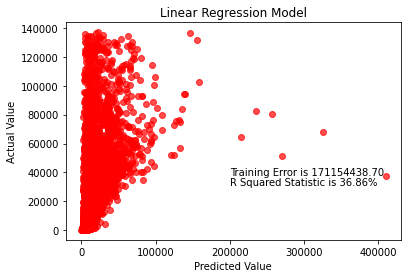

In [56]:
## Comparison of Training Data for Final Model
plt.scatter(y_pred_c, target_c, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Linear Regression Model')
plt.text(200000,38000, 'Training Error is 171154438.70')
plt.text(200000,31000, 'R Squared Statistic is 36.86%')
plt.show()

Testing Error

In [57]:
## Making Predictions
y_pred_tst = fitted_model_c.predict(predictors_test_c)

In [58]:
mean_squared_error(target_test_c,y_pred_tst, squared= False)

12803.745088451089

In [59]:
mean_squared_error(target_test_c,y_pred_tst, squared= True)

163935888.29003537

In [60]:
r2_score(target_test_c,y_pred_tst)

0.4108741969505568

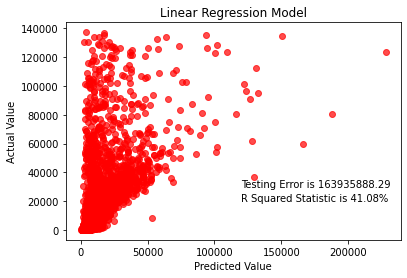

In [63]:
plt.scatter(y_pred_tst, target_test_c, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Linear Regression Model')
plt.text(120000,30000,'Testing Error is 163935888.29')
plt.text(120000,20000, 'R Squared Statistic is 41.08%')
plt.show()

QUADRATIC REGRESSION


WITHOUT CATEGORICAL VARIABLES

In [39]:
## Fitting model for differnet combinations
number_degrees= [2,3,4]
plt_r_squared=[]
for degree in number_degrees:
    poly_model= pr.PolynomialFeatures(degree=degree)
    poly_x_values= poly_model.fit_transform(predictors)
    poly_model.fit(poly_x_values,target)
    regression_model= LinearRegression()
    regression_model.fit(poly_x_values,target)
    target_pred=regression_model.predict(poly_x_values)
    plt_r_squared.append(r2_score(target,target_pred))


Text(0.5, 1.0, 'Model Performance Without Categorical Variables')

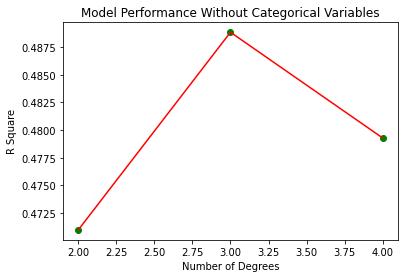

In [40]:
plt.scatter(number_degrees,plt_r_squared, color= "green")
plt.plot(number_degrees,plt_r_squared, color= "red")
plt.xlabel('Number of Degrees')
plt.ylabel('R Square')
plt.title('Model Performance Without Categorical Variables')

In [ ]:
poly_model= pr.PolynomialFeatures(degree=2)
poly_x_values= poly_model.fit_transform(predictors)
poly_model.fit(poly_x_values,target)
regression_model= LinearRegression()
regression_model.fit(poly_x_values,target)

In [ ]:
y_pred=regression_model.predict(poly_x_values)


In [ ]:
mean_squared_error(target,y_pred, squared= False)

In [ ]:
mean_squared_error(target,y_pred, squared= True)

In [ ]:
r2_score(target,y_pred)

In [ ]:
plt.scatter(y_pred, target, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Polynomial Regression Model')
plt.show()

In [ ]:
poly_x_values= poly_model.fit_transform(predictors_test)
y_pred_tst=regression_model.predict(poly_x_values)
mean_squared_error(target_test,y_pred_tst)

In [ ]:
mean_squared_error(target_test,y_pred_tst, squared= False)

In [ ]:
r2_score(target_test,y_pred_tst)

In [ ]:
plt.scatter(y_pred_tst, target_test, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Polynomial Regression Model')
plt.show()

WITH CATEGORICAL VARIABLES

In [64]:
#3 fitting model for different combinations
number_degrees= [2,3,4,5]
plt_r_squared_c=[]
for degree in number_degrees:
    poly_model= pr.PolynomialFeatures(degree=degree)
    poly_x_values= poly_model.fit_transform(predictors_c)
    poly_model.fit(poly_x_values,target_c)
    regression_model= LinearRegression()
    regression_model.fit(poly_x_values,target_c)
    target_pred=regression_model.predict(poly_x_values)
    plt_r_squared_c.append(r2_score(target_c,target_pred))


Text(0.5, 1.0, 'Model Performance')

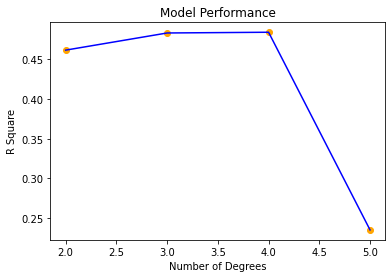

In [65]:
plt.scatter(number_degrees,plt_r_squared_c, color= "orange")
plt.plot(number_degrees,plt_r_squared_c, color= "blue")
plt.xlabel('Number of Degrees')
plt.ylabel('R Square')
plt.title('Model Performance')

In [66]:
## Choosing the Number of Degrees = 2
poly_model= pr.PolynomialFeatures(degree=2)
poly_x_values= poly_model.fit_transform(predictors_c)
poly_model.fit(poly_x_values,target_c)
regression_model= LinearRegression()
regression_model.fit(poly_x_values,target_c)

LinearRegression()

Training Error

In [67]:
y_pred=regression_model.predict(poly_x_values) ## Making Prediction

In [68]:
mean_squared_error(target_c,y_pred, squared= False)  ## RMSE

12079.243377032808

In [69]:
mean_squared_error(target_c,y_pred, squared= True)  ## MSE

145908120.56159097

In [70]:
r2_score(target_c,y_pred)  ## Rsquare

0.4618119082499871

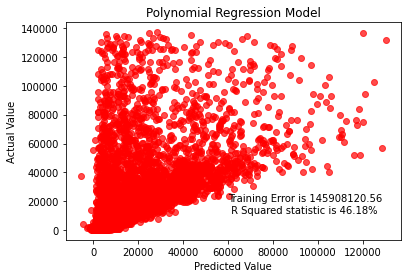

In [71]:
plt.scatter(y_pred, target_c, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Polynomial Regression Model')
plt.text(60000,20000,'Training Error is 145908120.56')
plt.text(60000,12000,' R Squared statistic is 46.18%')
plt.show()

Testing Error

In [72]:
poly_x_values= poly_model.fit_transform(predictors_test_c)
y_pred_tst=regression_model.predict(poly_x_values)


In [73]:
mean_squared_error(target_test_c,y_pred_tst, squared= False)

12333.770063205415

In [74]:
mean_squared_error(target_test_c,y_pred_tst, squared= True)

152121883.97202212

In [75]:
r2_score(target_test_c,y_pred_tst)

0.45332942047529

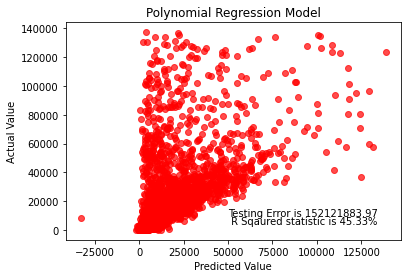

In [76]:
plt.scatter(y_pred_tst, target_test_c, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Polynomial Regression Model')
plt.text(50000, 10000, 'Testing Error is 152121883.97')
plt.text(50000, 4100,' R Sqaured statistic is 45.33%')
plt.show()

Generalized Additive Model

In [112]:
## Checking Different Model
mse_train1 = []
mse_train2 = []
mse_train3 = []
rsqr_train1= []
rsqr_train2 = []
rsqr_train3 = []
mse_test1 = []
mse_test2 = []
mse_test3 = []
rsqr_test1= []
rsqr_test2 = []
rsqr_test3 = []
for i in np.arange(1,10,1):
    gam1= pyg.LinearGAM(lam= i).gridsearch(predictors_c.values, target_c.values,n_splines=np.arange(3,30,1), keep_best= True, objective = 'auto')
    gam2= pyg.LinearGAM(lam= i).gridsearch(predictors_c.values, target_c.values,n_splines=np.arange(3,30,1), keep_best= True, objective = 'AIC')
    gam3= pyg.LinearGAM(lam= i).gridsearch(predictors_c.values, target_c.values,n_splines=np.arange(3,30,1), keep_best= True, objective = 'AICc')
    y_pred1= gam1.predict(predictors_c)
    y_pred2= gam2.predict(predictors_c)
    y_pred3= gam3.predict(predictors_c)
    a1= mean_squared_error(target_c, y_pred1)
    a2= mean_squared_error(target_c, y_pred2)
    a3 = mean_squared_error(target_c, y_pred3)
    b1= r2_score(target_c, y_pred1)
    b2= r2_score(target_c, y_pred2)
    b3= r2_score(target_c, y_pred3)
    y_pred1_test= gam1.predict(predictors_test_c)
    y_pred2_test= gam2.predict(predictors_test_c)
    y_pred3_test= gam3.predict(predictors_test_c)
    c1= mean_squared_error(target_test_c, y_pred1_test)
    c2= mean_squared_error(target_test_c, y_pred2_test)
    c3 = mean_squared_error(target_test_c, y_pred3_test)
    d1= r2_score(target_test_c, y_pred1_test)
    d2= r2_score(target_test_c, y_pred2_test)
    d3= r2_score(target_test_c, y_pred3_test)
    mse_train1.append(a1)
    mse_train2.append(a2)
    mse_train3.append(a3)
    rsqr_train1.append(b1)
    rsqr_train2.append(b2)
    rsqr_train3.append(b3)
    mse_test1.append(c1)
    mse_test2.append(c2)
    mse_test3.append(c3)
    rsqr_test1.append(d1)
    rsqr_test2.append(d2)
    rsqr_test3.append(d3)

  0% (0 of 27) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  7% (2 of 27) |#                        | Elapsed Time: 0:00:00 ETA:   0:00:07
 11% (3 of 27) |##                       | Elapsed Time: 0:00:01 ETA:   0:00:11
 14% (4 of 27) |###                      | Elapsed Time: 0:00:02 ETA:   0:00:13
 18% (5 of 27) |####                     | Elapsed Time: 0:00:03 ETA:   0:00:19
 22% (6 of 27) |#####                    | Elapsed Time: 0:00:04 ETA:   0:00:19
 25% (7 of 27) |######                   | Elapsed Time: 0:00:05 ETA:   0:00:21
 29% (8 of 27) |#######                  | Elapsed Time: 0:00:06 ETA:   0:00:22
 33% (9 of 27) |########                 | Elapsed Time: 0:00:08 ETA:   0:00:27
 37% (10 of 27) |########                | Elapsed Time: 0:00:10 ETA:   0:00:30
 40% (11 of 27) |#########               | Elapsed Time: 0:00:12 ETA:   0:00:34
 44% (12 of 27) |##########              | Elapsed Time: 0:00:14 ETA:   0:00:30
 48% (13 of 27) |###########            

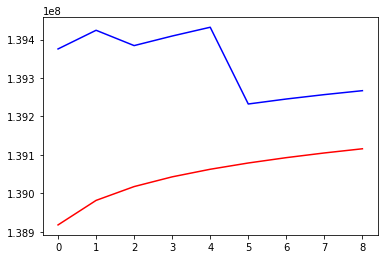

In [116]:
plt.plot(mse_train1, color ='b')
plt.plot(mse_train2, color ='r')
# plt.plot(mse_train3)


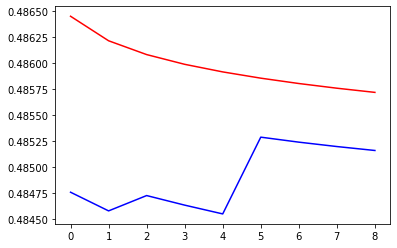

In [119]:
plt.plot(rsqr_train1, color ='b')
plt.plot(rsqr_train2, color ='r')
# plt.plot(rsqr_train3)

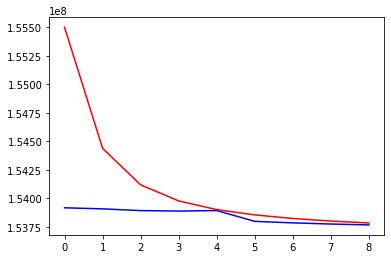

In [123]:
plt.plot(mse_test1, color ='b')
plt.plot(mse_test2, color ='r')
# plt.plot(mse_test3)

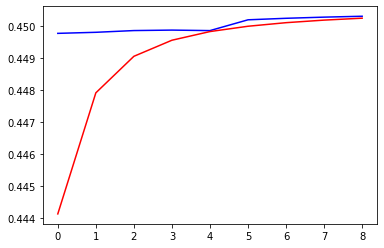

In [124]:
plt.plot(rsqr_test1, color ='b')
plt.plot(rsqr_test2, color ='r')
# plt.plot(rsqr_test3)

Final Model

In [86]:
gam= pyg.LinearGAM(lam=3.9).gridsearch(predictors_c.values, target_c.values,n_splines=np.arange(4,30,1), spline_order= np.arange(1,4,1), keep_best= True, objective = 'auto')

  0% (0 of 78) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  1% (1 of 78) |                         | Elapsed Time: 0:00:00 ETA:   0:00:29
  2% (2 of 78) |                         | Elapsed Time: 0:00:00 ETA:   0:00:29
  3% (3 of 78) |                         | Elapsed Time: 0:00:01 ETA:   0:00:31
  5% (4 of 78) |#                        | Elapsed Time: 0:00:01 ETA:   0:00:31
  6% (5 of 78) |#                        | Elapsed Time: 0:00:02 ETA:   0:00:32
  7% (6 of 78) |#                        | Elapsed Time: 0:00:02 ETA:   0:00:34
  8% (7 of 78) |##                       | Elapsed Time: 0:00:03 ETA:   0:00:35
 10% (8 of 78) |##                       | Elapsed Time: 0:00:03 ETA:   0:00:36
 11% (9 of 78) |##                       | Elapsed Time: 0:00:04 ETA:   0:00:38
 12% (10 of 78) |###                     | Elapsed Time: 0:00:05 ETA:   0:00:38
 14% (11 of 78) |###                     | Elapsed Time: 0:00:05 ETA:   0:00:41
 15% (12 of 78) |###                    

In [87]:
gam.get_params

<bound method Core.get_params of LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + intercept,
   tol=0.0001, verbose=False)>

In [88]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     83.9536
Link Function:                     IdentityLink Log Likelihood:                               -487472.3914
Number of Samples:                        24760 AIC:                                           975114.6899
                                                AICc:                                          975115.2818
                                                GCV:                                        142532518.5357
                                                Scale:                                      141662870.1674
                                                Pseudo R-Squared:                                   0.4792
Feature Function                  Lam

C:\Users\asus\AppData\Local\Temp\ipykernel_6360\3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


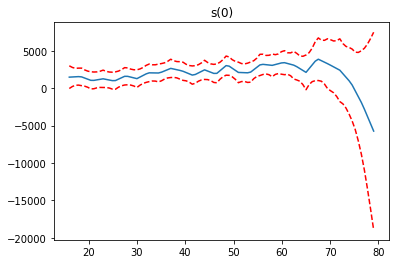

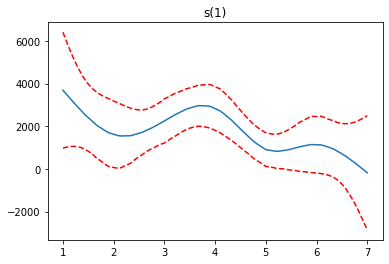

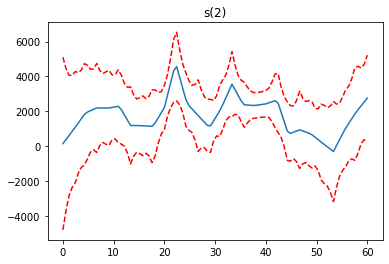

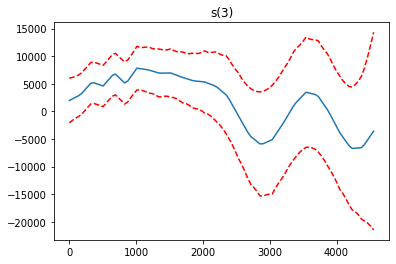

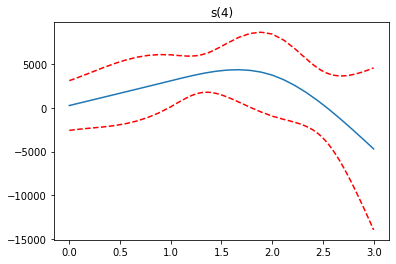

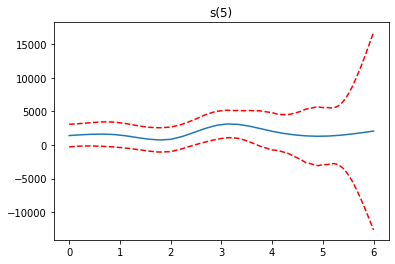

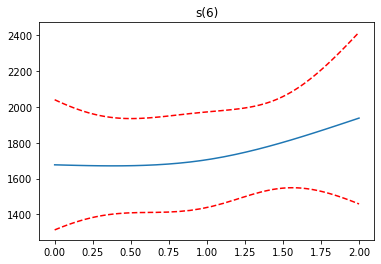

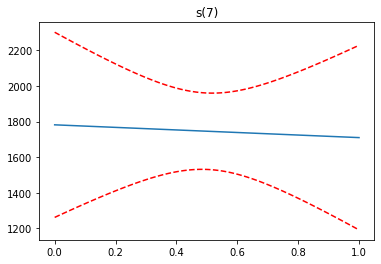

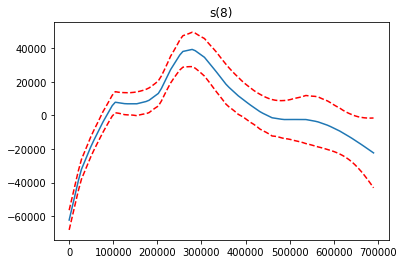

In [89]:
## Partial Dependency Plot
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(repr(term))
    plt.show()


Training Error

In [90]:
y_pred= gam.predict(predictors_c)

In [91]:
mean_squared_error(target_c, y_pred, squared= False)

11882.025700250384

In [92]:
mean_squared_error(target_c, y_pred, squared= True)

141182534.74141064

In [93]:
r2_score(target_c, y_pred)

0.4792424255178056

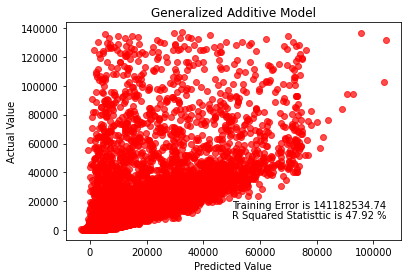

In [94]:
plt.scatter(y_pred, target_c, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Generalized Additive Model')
plt.text(50000, 15000, 'Training Error is 141182534.74')
plt.text(50000, 8000, 'R Squared Statisttic is 47.92 %')
plt.show()

Testing Error

In [95]:
y_pred_tst= gam.predict(predictors_test_c)

In [96]:
mean_squared_error(target_test_c, y_pred_tst, squared= False)

12156.69850245878

In [97]:
mean_squared_error(target_test_c, y_pred_tst, squared= True)

147785318.47968352

In [98]:
r2_score(target_test_c, y_pred_tst)

0.46891345551971275

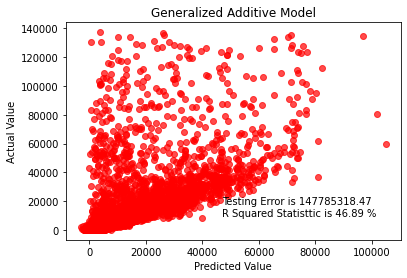

In [99]:
plt.scatter(y_pred_tst, target_test_c, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Generalized Additive Model')
plt.text(47000, 18000, 'Testing Error is 147785318.47')
plt.text(47000, 10000, 'R Squared Statisttic is 46.89 %')
plt.show()

___________________________________________TREE_BASED METHODS________________________________________________

BAGGING

In [151]:
## Searching For Best parameters for different combinations of Paramenters
params = {'n_estimators' : [10,20,30,40,50,60,70,70,90,100,110,120,130,140,150],
          'max_samples': [0.25,0.5,0.75],
          'bootstrap': [True, False]
          }
          

bagging_regressor_grid = RandomizedSearchCV(BaggingRegressor(random_state=1, n_jobs=-1, bootstrap_features= False, oob_score= False), param_distributions= params,
    scoring='neg_mean_squared_error', n_iter= 20, random_state=56, n_jobs=-1)

In [152]:
## fitting to search
bagging_regressor_grid.fit(predictors_c, target_c)

RandomizedSearchCV(estimator=BaggingRegressor(n_jobs=-1, random_state=1),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_samples': [0.25, 0.5, 0.75],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 70, 90, 100, 110,
                                                         120, 130, 140, 150]},
                   random_state=56, scoring='neg_mean_squared_error')

In [153]:
print('Best Parameters : ',bagging_regressor_grid.best_params_)

Best Parameters :  {'n_estimators': 70, 'max_samples': 0.25, 'bootstrap': True}


In [154]:
#3 Checking Different Models
mse_train1 = []
mse_train2 = []
mse_train3 = []
rsqr_train1= []
rsqr_train2 = []
rsqr_train3 = []
mse_test1 = []
mse_test2 = []
mse_test3 = []
rsqr_test1= []
rsqr_test2 = []
rsqr_test3 = []
for i in np.arange(20,150,10):
    model1=BaggingRegressor(n_estimators= i,max_samples= 0.25, n_jobs=-1,random_state=56, bootstrap= True, oob_score= False).fit(predictors_c,target_c)
    model2=BaggingRegressor(n_estimators= i,max_samples= 0.35, n_jobs=-1,random_state=56, bootstrap= True, oob_score= False).fit(predictors_c,target_c)
    model3=BaggingRegressor(n_estimators= i,max_samples= 0.65, n_jobs=-1,random_state=56, bootstrap= True, oob_score= False).fit(predictors_c,target_c)
    y_pred1= model1.predict(predictors_c)
    y_pred2= model2.predict(predictors_c)
    y_pred3= model3.predict(predictors_c)
    a1= mean_squared_error(target_c, y_pred1)
    a2= mean_squared_error(target_c, y_pred2)
    a3 = mean_squared_error(target_c, y_pred3)
    b1= r2_score(target_c, y_pred1)
    b2= r2_score(target_c, y_pred2)
    b3= r2_score(target_c, y_pred3)
    y_pred1_test= model1.predict(predictors_test_c)
    y_pred2_test= model2.predict(predictors_test_c)
    y_pred3_test= model3.predict(predictors_test_c)
    c1= mean_squared_error(target_test_c, y_pred1_test)
    c2= mean_squared_error(target_test_c, y_pred2_test)
    c3 = mean_squared_error(target_test_c, y_pred3_test)
    d1= r2_score(target_test_c, y_pred1_test)
    d2= r2_score(target_test_c, y_pred2_test)
    d3= r2_score(target_test_c, y_pred3_test)
    mse_train1.append(a1)
    mse_train2.append(a2)
    mse_train3.append(a3)
    rsqr_train1.append(b1)
    rsqr_train2.append(b2)
    rsqr_train3.append(b3)
    mse_test1.append(c1)
    mse_test2.append(c2)
    mse_test3.append(c3)
    rsqr_test1.append(d1)
    rsqr_test2.append(d2)
    rsqr_test3.append(d3)


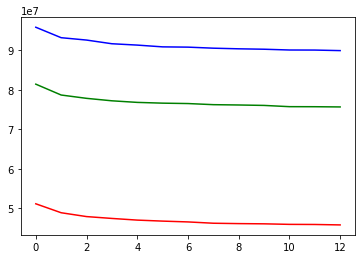

In [155]:
plt.plot(mse_train1, color = 'b')
plt.plot(mse_train2, color = 'g')
plt.plot(mse_train3, color = 'r')

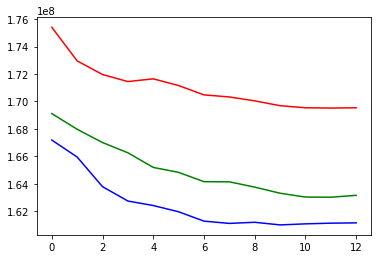

In [156]:
plt.plot(mse_test1, color = 'b')
plt.plot(mse_test2, color = 'g')
plt.plot(mse_test3, color = 'r')

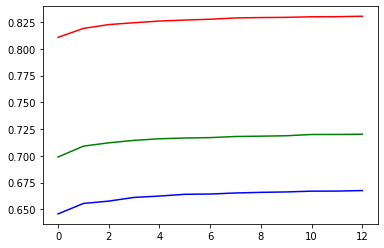

In [157]:
plt.plot(rsqr_train1, color = 'b')
plt.plot(rsqr_train2, color = 'g')
plt.plot(rsqr_train3, color = 'r')

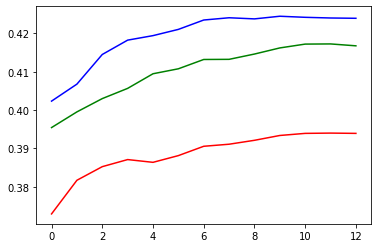

In [158]:
plt.plot(rsqr_test1, color = 'b')
plt.plot(rsqr_test2, color = 'g')
plt.plot(rsqr_test3, color = 'r')

Final Model

In [100]:
model=BaggingRegressor(n_estimators= 100,max_samples= 0.35, n_jobs=-1,random_state=56, bootstrap= True, oob_score= False)
fitted=model.fit(predictors_c,target_c)
model.score(predictors_c,target_c)

0.7156586297570533

Training Error

In [101]:
y_pred= model.predict(predictors_c)

In [102]:
mean_squared_error(target_c,y_pred, squared= False)

8779.963604073659

In [103]:
mean_squared_error(target_c,y_pred, squared= True)

77087760.88885812

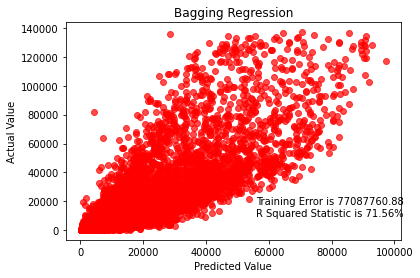

In [104]:
plt.scatter(y_pred, target_c, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Bagging Regression')
plt.text(56000, 18000,'Training Error is 77087760.88')
plt.text(56000, 10000,'R Squared Statistic is 71.56%')
plt.show()

Testing Error

In [105]:
y_pred_tst=model.predict(predictors_test_c)

In [106]:
mean_squared_error(target_test_c,y_pred_tst, squared= False)

12451.242954887877

In [107]:
mean_squared_error(target_test_c,y_pred_tst, squared= True)

155033451.121645

In [108]:
r2_score(target_test_c,y_pred_tst)

0.4428663098468272

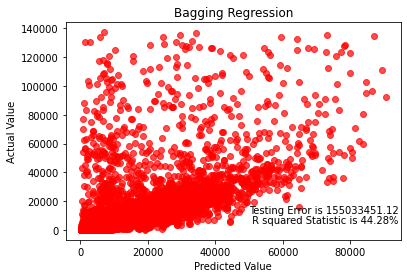

In [110]:
plt.scatter(y_pred_tst, target_test, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Bagging Regression')
plt.text(50000,12000,'Testing Error is 155033451.12')
plt.text(50000,4700,' R squared Statistic is 44.28%')
plt.show()

RANDOM FOREST

In [214]:
## Searching Parameters
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    'warm_start' : [True, False],
    'max_depth' : [3,6,9,12,15,18,21,24],
    'max_samples' : [0.25, 0.35, 0.45, 0.55,0.65,0.75]
}
search_cv = RandomizedSearchCV(
    RandomForestRegressor(max_features= 'sqrt', bootstrap= True, oob_score= True), param_distributions= param_distributions,
    scoring='neg_mean_squared_error', n_iter= 100, random_state=56, n_jobs=-1
)
search_cv.fit(predictors_c, target_c)

RandomizedSearchCV(estimator=RandomForestRegressor(max_features='sqrt',
                                                   oob_score=True),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [3, 6, 9, 12, 15, 18, 21,
                                                      24],
                                        'max_leaf_nodes': [2, 5, 10, 20, 50,
                                                           100],
                                        'max_samples': [0.25, 0.35, 0.45, 0.55,
                                                        0.65, 0.75],
                                        'n_estimators': [1, 2, 5, 10, 20, 50,
                                                         100, 200, 500],
                                        'warm_start': [True, False]},
                   random_state=56, scoring='neg_mean_squared_error')

In [215]:
search_cv.best_estimator_

RandomForestRegressor(max_depth=9, max_features='sqrt', max_leaf_nodes=100,
                      max_samples=0.55, n_estimators=50, oob_score=True,
                      warm_start=True)

In [229]:
## Checking Different Models
mse_train1 = []
mse_train2 = []
mse_train3 = []
mse_train4 = []
rsqr_train1= []
rsqr_train2 = []
rsqr_train3 = []
rsqr_train4 = []
mse_test1 = []
mse_test2 = []
mse_test3 = []
mse_test4 = []
rsqr_test1= []
rsqr_test2 = []
rsqr_test3 = []
rsqr_test4 = []
for i in np.arange(100,500,10):
    model1= RandomForestRegressor(n_estimators= i, n_jobs= -1, max_samples=0.25, random_state= 56, max_features= "sqrt", bootstrap= True, oob_score= True, max_depth=15, max_leaf_nodes=100).fit(predictors_c,target_c)
    model2= RandomForestRegressor(n_estimators= i, n_jobs= -1, max_samples=0.35, random_state= 56, max_features= "sqrt", bootstrap= True, oob_score= True, max_depth=15, max_leaf_nodes=100).fit(predictors_c,target_c)
    model3= RandomForestRegressor(n_estimators= i, n_jobs= -1, max_samples=0.55, random_state= 56, max_features= "sqrt", bootstrap= True, oob_score= True, max_depth=15, max_leaf_nodes=100).fit(predictors_c,target_c)
    model4= RandomForestRegressor(n_estimators= i, n_jobs= -1, max_samples=0.75, random_state= 56, max_features= "sqrt", bootstrap= True, oob_score= True, max_depth=15, max_leaf_nodes=100).fit(predictors_c,target_c)
    y_pred1= model1.predict(predictors_c)
    y_pred2= model2.predict(predictors_c)
    y_pred3= model3.predict(predictors_c)
    y_pred4= model4.predict(predictors_c)
    a1= mean_squared_error(target_c, y_pred1)
    a2= mean_squared_error(target_c, y_pred2)
    a3 = mean_squared_error(target_c, y_pred3)
    a4 = mean_squared_error(target_c, y_pred4)
    b1= r2_score(target_c, y_pred1)
    b2= r2_score(target_c, y_pred2)
    b3= r2_score(target_c, y_pred3)
    b4= r2_score(target_c, y_pred4)
    y_pred1_test= model1.predict(predictors_test_c)
    y_pred2_test= model2.predict(predictors_test_c)
    y_pred3_test= model3.predict(predictors_test_c)
    y_pred4_test= model4.predict(predictors_test_c)
    c1= mean_squared_error(target_test_c, y_pred1_test)
    c2= mean_squared_error(target_test_c, y_pred2_test)
    c3 = mean_squared_error(target_test_c, y_pred3_test)
    c4 = mean_squared_error(target_test_c, y_pred4_test)
    d1= r2_score(target_test_c, y_pred1_test)
    d2= r2_score(target_test_c, y_pred2_test)
    d3= r2_score(target_test_c, y_pred3_test)
    d4= r2_score(target_test_c, y_pred4_test)
    mse_train1.append(a1)
    mse_train2.append(a2)
    mse_train3.append(a3)
    mse_train4.append(a4)
    rsqr_train1.append(b1)
    rsqr_train2.append(b2)
    rsqr_train3.append(b3)
    rsqr_train4.append(b4)
    mse_test1.append(c1)
    mse_test2.append(c2)
    mse_test3.append(c3)
    mse_test4.append(c4)
    rsqr_test1.append(d1)
    rsqr_test2.append(d2)
    rsqr_test3.append(d3)
    rsqr_test4.append(d4)


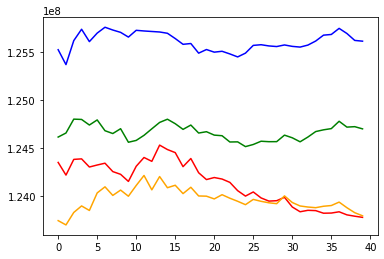

In [230]:
plt.plot(mse_train1, color = 'b')  ## Max Samples 0.25
plt.plot(mse_train2, color = 'g')  ## Max Samples 0.35
plt.plot(mse_train3, color = 'r')   ## Max Samples 0.55
plt.plot(mse_train4, color = 'orange')  ## Max Samples 0.75


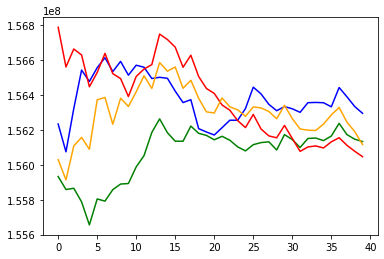

In [231]:
plt.plot(mse_test1, color = 'b')
plt.plot(mse_test2, color = 'g')
plt.plot(mse_test3, color = 'r')
plt.plot(mse_test4, color = 'orange')

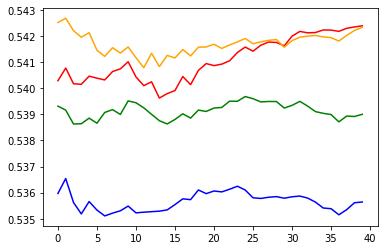

In [232]:
plt.plot(rsqr_train1, color = 'b')
plt.plot(rsqr_train2, color = 'g')
plt.plot(rsqr_train3, color = 'r')
plt.plot(rsqr_train4, color = 'orange')

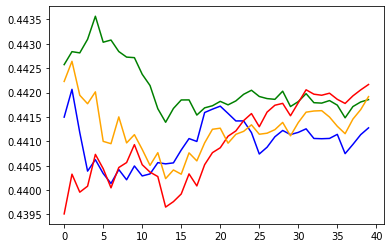

In [233]:
plt.plot(rsqr_test1, color = 'b')
plt.plot(rsqr_test2, color = 'g')
plt.plot(rsqr_test3, color = 'r')
plt.plot(rsqr_test4, color = 'orange')

Final Model

In [111]:
ranforreg= RandomForestRegressor(n_estimators= 500, n_jobs= -1, max_samples=0.55, random_state= 56, max_features= "sqrt", bootstrap= True, oob_score= True, max_depth=15, max_leaf_nodes=100)
ranforreg.fit(predictors_c,target_c)
print('Training Coefficient of r^2: %.3f'%ranforreg.score(predictors_c,target_c))

Training Coefficient of r^2: 0.533


In [112]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

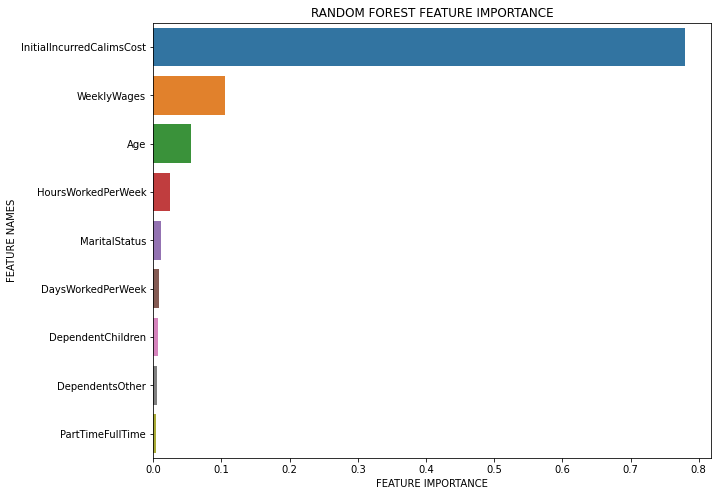

In [113]:
plot_feature_importance(ranforreg.feature_importances_,predictors_c.columns,'RANDOM FOREST ')

Training Error

In [114]:
y_pred= ranforreg.predict(predictors_c)

In [115]:
mean_squared_error(target_c,y_pred, squared= False)

11257.241956802503

In [116]:
mean_squared_error(target_c,y_pred, squared= True)

126725496.47399464

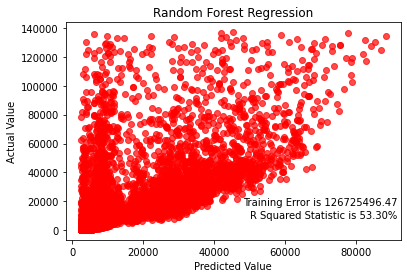

In [117]:
plt.scatter(y_pred, target_c, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Random Forest Regression')
plt.text(48000,17000,'Training Error is 126725496.47')
plt.text(50000,8000,'R Squared Statistic is 53.30%')
plt.show()

Testing Error

In [118]:
y_pred_tst= ranforreg.predict(predictors_test_c)

In [119]:
mean_squared_error(target_test_c,y_pred_tst, squared = False)


12283.783252901923

In [120]:
mean_squared_error(target_test_c,y_pred_tst, squared = True)

150891331.00427377

In [121]:
r2_score(target_test_c,y_pred_tst)

0.4577515791184117

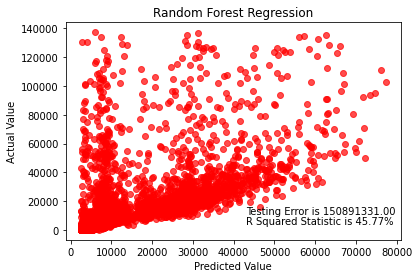

In [124]:
plt.scatter(y_pred_tst, target_test, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Random Forest Regression')
plt.text(43000,11000,'Testing Error is 150891331.00')
plt.text(43000,4000,'R Squared Statistic is 45.77%')
plt.show()

GRADIENT BOOSTING

In [253]:
## Searching for the Best Parameters
param_distributions = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "learning_rate": loguniform(0.01, 1),
    'warm_start' : [True, False],
    'max_depth' : [3,6,9,12,15,18,21,24]
}
search_cv = RandomizedSearchCV(
    GradientBoostingRegressor(max_features= 'sqrt'), param_distributions= param_distributions,
    scoring='neg_mean_squared_error', n_iter= 200, random_state=56, n_jobs=-1
)
search_cv.fit(predictors_c, target_c)

RandomizedSearchCV(estimator=GradientBoostingRegressor(max_features='sqrt'),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000019A8A914040>,
                                        'max_depth': [3, 6, 9, 12, 15, 18, 21,
                                                      24],
                                        'max_leaf_nodes': [2, 5, 10, 20, 50,
                                                           100],
                                        'n_estimators': [1, 2, 5, 10, 20, 50,
                                                         100, 200, 500],
                                        'warm_start': [True, False]},
                   random_state=56, scoring='neg_mean_squared_error')

In [254]:
## Best Parameter
search_cv.best_estimator_

GradientBoostingRegressor(learning_rate=0.024172083932884295, max_depth=18,
                          max_features='sqrt', max_leaf_nodes=5,
                          n_estimators=500, warm_start=True)

In [275]:
## Comparing the models and Using cross validation on testind data to find the best parameter
mse_train1 = []
mse_train2 = []
mse_train3 = []
mse_train4 = []
rsqr_train1= []
rsqr_train2 = []
rsqr_train3 = []
rsqr_train4 = []
mse_test1 = []
mse_test2 = []
mse_test3 = []
mse_test4 = []
rsqr_test1= []
rsqr_test2 = []
rsqr_test3 = []
rsqr_test4 = []
for i in np.arange(120,700,10):
    model1= GradientBoostingRegressor(learning_rate=0.015, max_features='sqrt',max_depth=12, max_leaf_nodes=12 ,n_estimators= i , random_state= 56, criterion= 'squared_error', warm_start=True).fit(predictors_c,target_c)
    model2= GradientBoostingRegressor(learning_rate=0.025, max_features='sqrt',max_depth=12, max_leaf_nodes=12 ,n_estimators= i , random_state= 56, criterion= 'squared_error', warm_start=True).fit(predictors_c,target_c)
    model3= GradientBoostingRegressor(learning_rate=0.035, max_features='sqrt',max_depth=12, max_leaf_nodes=12 ,n_estimators= i , random_state= 56, criterion= 'squared_error', warm_start=True).fit(predictors_c,target_c)
    model4= GradientBoostingRegressor(learning_rate=0.045, max_features='sqrt',max_depth=12, max_leaf_nodes=12 ,n_estimators= i , random_state= 56, criterion= 'squared_error', warm_start=True).fit(predictors_c,target_c)
    y_pred1= model1.predict(predictors_c)
    y_pred2= model2.predict(predictors_c)
    y_pred3= model3.predict(predictors_c)
    y_pred4= model4.predict(predictors_c)
    a1= mean_squared_error(target_c, y_pred1)
    a2= mean_squared_error(target_c, y_pred2)
    a3 = mean_squared_error(target_c, y_pred3)
    a4 = mean_squared_error(target_c, y_pred4)
    b1= r2_score(target_c, y_pred1)
    b2= r2_score(target_c, y_pred2)
    b3= r2_score(target_c, y_pred3)
    b4= r2_score(target_c, y_pred4)
    y_pred1_test= model1.predict(predictors_test_c)
    y_pred2_test= model2.predict(predictors_test_c)
    y_pred3_test= model3.predict(predictors_test_c)
    y_pred4_test= model4.predict(predictors_test_c)
    c1= mean_squared_error(target_test_c, y_pred1_test)
    c2= mean_squared_error(target_test_c, y_pred2_test)
    c3 = mean_squared_error(target_test_c, y_pred3_test)
    c4 = mean_squared_error(target_test_c, y_pred4_test)
    d1= r2_score(target_test_c, y_pred1_test)
    d2= r2_score(target_test_c, y_pred2_test)
    d3= r2_score(target_test_c, y_pred3_test)
    d4= r2_score(target_test_c, y_pred4_test)
    mse_train1.append(a1)
    mse_train2.append(a2)
    mse_train3.append(a3)
    mse_train4.append(a4)
    rsqr_train1.append(b1)
    rsqr_train2.append(b2)
    rsqr_train3.append(b3)
    rsqr_train4.append(b4)
    mse_test1.append(c1)
    mse_test2.append(c2)
    mse_test3.append(c3)
    mse_test4.append(c4)
    rsqr_test1.append(d1)
    rsqr_test2.append(d2)
    rsqr_test3.append(d3)
    rsqr_test4.append(d4)


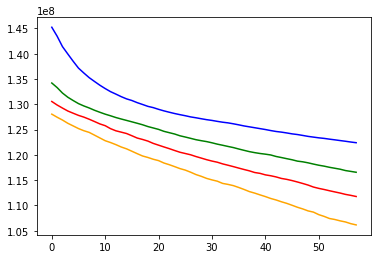

In [276]:
plt.plot(mse_train1, color = 'b')  ## learning rate 0.015
plt.plot(mse_train2, color = 'g')   ## learning rate 0.025
plt.plot(mse_train3, color = 'r')    ## learning rate 0.025
plt.plot(mse_train4, color = 'orange')   ## learning rate 0.035

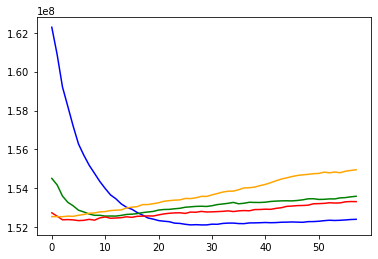

In [277]:
plt.plot(mse_test1, color = 'b')   ## learning rate 0.015
plt.plot(mse_test2, color = 'g')   ## learning rate 0.025
plt.plot(mse_test3, color = 'r')    ## learning rate 0.035
plt.plot(mse_test4, color = 'orange')   ## learning rate 0.045

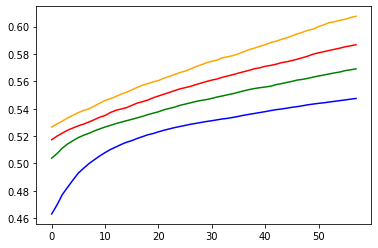

In [278]:
plt.plot(rsqr_train1, color = 'b')  ## learning rate 0.015
plt.plot(rsqr_train2, color = 'g')   ## learning rate 0.025
plt.plot(rsqr_train3, color = 'r')    ## learning rate 0.035
plt.plot(rsqr_train4, color = 'orange')  ## learning rate 0.045

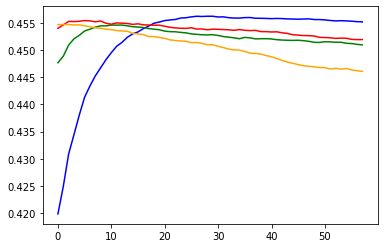

In [279]:
plt.plot(rsqr_test1, color = 'b')  ## learning rate 0.015
plt.plot(rsqr_test2, color = 'g')   ## learning rate 0.025
plt.plot(rsqr_test3, color = 'r')    ## learning rate 0.035
plt.plot(rsqr_test4, color = 'orange')  ## learning rate 0.045

In [125]:
gbr = GradientBoostingRegressor(learning_rate=0.015, max_features='sqrt',max_depth=12, max_leaf_nodes=12 ,n_estimators=250, random_state= 56, criterion= 'squared_error', warm_start=True)
gbr.fit(predictors_c, target_c)
gbr.score(predictors_c,target_c)

0.5038851905603645

Training Error

In [126]:
y_pred= gbr.predict(predictors_c)

In [127]:
mean_squared_error(target_c,y_pred, squared= False)

11597.484086523908

In [128]:
mean_squared_error(target_c,y_pred, squared= True)

134501637.1371753

In [129]:
r2_score(target_c,y_pred)

0.5038851905603645

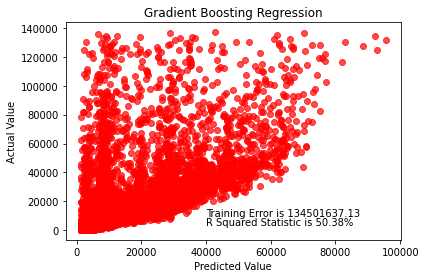

In [130]:
plt.scatter(y_pred, target_c, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Gradient Boosting Regression')
plt.text(40000,10000,'Training Error is 134501637.13')
plt.text(40000,3200,'R Squared Statistic is 50.38%')
plt.show()

Testing Error

In [131]:
y_pred_tst= gbr.predict(predictors_test_c)

In [132]:
mean_squared_error(target_test_c, y_pred_tst, squared= False)

12140.808532417977

In [133]:
mean_squared_error(target_test_c,y_pred_tst, squared= True)

147399231.82083315

In [134]:
r2_score(target_test_c,y_pred_tst)

0.4703009101845478

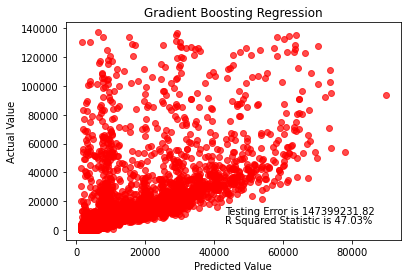

In [135]:
plt.scatter(y_pred_tst, target_test_c, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Gradient Boosting Regression')
plt.text(43000,11000,'Testing Error is 147399231.82')
plt.text(43000,5000,'R Squared Statistic is 47.03%')
plt.show()

ANN

In [136]:
model=Sequential()
model.add(Dense(64, input_dim= 9, activation = 'relu'))
model.add(Dense(32, activation = 'relu', kernel_initializer= 'uniform'))
model.add(Dense(16, activation = 'relu', kernel_initializer= 'uniform'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss= 'mse', optimizer= 'adam', metrics= 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________


In [137]:
history= model.fit(predictors_c, target_c, validation_data= (predictors_test_c, target_test_c), epochs= 1000, batch_size=64)

Epoch 1/1000
387/387 [==============================] - 3s 4ms/step - loss: 210063648.0000 - mse: 210063648.0000 - val_loss: 169297216.0000 - val_mse: 169297216.0000
Epoch 2/1000
387/387 [==============================] - 1s 3ms/step - loss: 183897872.0000 - mse: 183897872.0000 - val_loss: 165611072.0000 - val_mse: 165611072.0000
Epoch 3/1000
387/387 [==============================] - 1s 3ms/step - loss: 182599664.0000 - mse: 182599664.0000 - val_loss: 164030144.0000 - val_mse: 164030144.0000
Epoch 4/1000
387/387 [==============================] - 1s 3ms/step - loss: 182667616.0000 - mse: 182667616.0000 - val_loss: 169692224.0000 - val_mse: 169692224.0000
Epoch 5/1000
387/387 [==============================] - 1s 3ms/step - loss: 177157488.0000 - mse: 177157488.0000 - val_loss: 163185248.0000 - val_mse: 163185248.0000
Epoch 6/1000
387/387 [==============================] - 1s 3ms/step - loss: 174752000.0000 - mse: 174752000.0000 - val_loss: 163869328.0000 - val_mse: 163869328.0000
Epoc

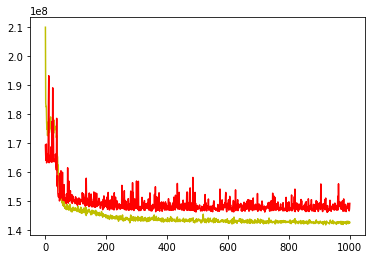

In [138]:
loss= history.history['loss']
val_loss= history.history['val_loss']
epochs= range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label= 'Training Loss')
plt.plot(epochs, val_loss, 'r', label= 'Validation Loss')

Training Error

In [139]:
y_pred= model.predict(predictors_c)

774/774 [==============================] - 1s 2ms/step


In [140]:
mean_squared_error(target_c, y_pred, squared = False)

11955.075935331963

In [141]:
mean_squared_error(target_c, y_pred, squared = True)

142923840.6195534

In [142]:
r2_score(target_c, y_pred)

0.47281954731127607

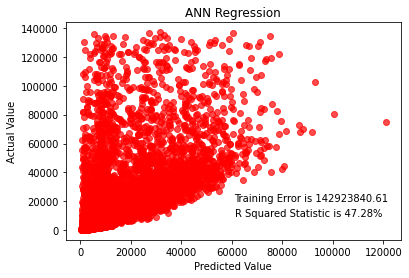

In [145]:
plt.scatter(y_pred, target_c, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('ANN Regression')
plt.text(61000,20000,'Training Error is 142923840.61')
plt.text(61000,10000,'R Squared Statistic is 47.28%')
plt.show()

Testing Error

In [146]:
y_test_pred= model.predict(predictors_test_c)

332/332 [==============================] - 1s 2ms/step


In [147]:
r2_score(target_test_c, y_test_pred)

0.463981374316477

In [148]:
mean_squared_error(target_test_c, y_test_pred, squared= False)

12213.016313316377

In [149]:
mean_squared_error(target_test_c, y_test_pred, squared= True)

149157767.46933195

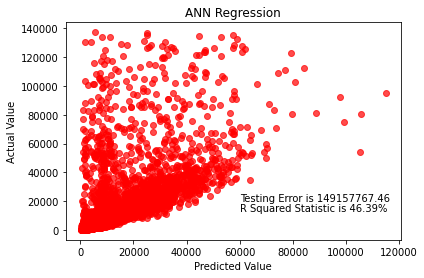

In [151]:
plt.scatter(y_test_pred, target_test_c, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('ANN Regression')
plt.text(60000,20000,'Testing Error is 149157767.46')
plt.text(60000,13000,'R Squared Statistic is 46.39%')
plt.show()

Removing even more Outliers and taking 90 percentile of the data

In [152]:
trainscaled= pd.DataFrame(training, columns = training.columns)

In [153]:
trainscaled['WeeklyWages']=trainscaled['WeeklyWages'].fillna(trainscaled['WeeklyWages'].mean())  ## Filling with Mean
trainscaled['HoursWorkedPerWeek']=trainscaled['HoursWorkedPerWeek'].fillna(trainscaled['HoursWorkedPerWeek'].mean())  ## Filling with Mean
trainscaled['MaritalStatus']=trainscaled['MaritalStatus'].fillna(trainscaled['MaritalStatus'].mode()[0])  ## Filling with Mode

In [154]:
## Changing the values type to numeric
trainscaled['Age'] = pd.to_numeric(trainscaled['Age']) 
trainscaled['DependentChildren'] = pd.to_numeric(trainscaled['DependentChildren'])
trainscaled['DependentsOther'] = pd.to_numeric(trainscaled['DependentsOther'])
trainscaled['WeeklyWages'] = pd.to_numeric(trainscaled['WeeklyWages'])
trainscaled['HoursWorkedPerWeek'] = pd.to_numeric(trainscaled['HoursWorkedPerWeek'])
trainscaled['DaysWorkedPerWeek'] = pd.to_numeric(trainscaled['DaysWorkedPerWeek'])
trainscaled['InitialIncurredCalimsCost'] = pd.to_numeric(trainscaled['InitialIncurredCalimsCost'])
trainscaled['UltimateIncurredClaimCost'] = pd.to_numeric(trainscaled['UltimateIncurredClaimCost'])

In [155]:
np.percentile(trainscaled['UltimateIncurredClaimCost'], 90)

23756.354574999998

In [156]:
trainscaled= trainscaled[trainscaled['UltimateIncurredClaimCost'] < 23760]

In [157]:
pred= trainscaled[['Age' , 'DaysWorkedPerWeek' , 'HoursWorkedPerWeek' , 'WeeklyWages' , 'DependentsOther' , 'DependentChildren', 'InitialIncurredCalimsCost']]
pred_c=trainscaled[['Age', 'DaysWorkedPerWeek' , 'HoursWorkedPerWeek' , 'WeeklyWages' , 'DependentsOther' , 'DependentChildren','MaritalStatus', 'PartTimeFullTime', 'InitialIncurredCalimsCost']]
targ=trainscaled['UltimateIncurredClaimCost']
targ_c= trainscaled['UltimateIncurredClaimCost']

In [158]:
## Changing the Categorical Variables to numeric using label encoder.
for x in pred_c.select_dtypes(include='object').columns:
    pred_c[x]=pr.LabelEncoder().fit_transform(pred_c[x])

C:\Users\asus\AppData\Local\Temp\ipykernel_6360\1682468800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_c[x]=pr.LabelEncoder().fit_transform(pred_c[x])


In [159]:
## Scaling
xx=pred_c.select_dtypes(exclude=[float,int]).columns
for i in xx :
    pred_c[str(i)]=pr.LabelEncoder().fit_transform(pred_c[str(i)])
predictors_c=pred_c.apply(pr.minmax_scale)

In [160]:
## Scaling
xx=pred.select_dtypes(exclude=[float,int]).columns
for i in xx :
    pred[str(i)]=pr.LabelEncoder().fit_transform(pred[str(i)])
predictors=pred.apply(pr.minmax_scale)

In [161]:
from sklearn.model_selection import train_test_split
predictors,predictors_test,target,target_test= train_test_split(pred,targ, test_size=0.3,random_state=8544)

In [162]:
from sklearn.model_selection import train_test_split
predictors_c,predictors_test_c,target_c,target_test_c= train_test_split(pred_c,targ_c, test_size=0.3,random_state=8544)

In [14]:
predictors_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22791 entries, 2493 to 174
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        22791 non-null  float64
 1   DaysWorkedPerWeek          22791 non-null  float64
 2   HoursWorkedPerWeek         22760 non-null  float64
 3   WeeklyWages                22756 non-null  float64
 4   DependentsOther            22791 non-null  float64
 5   DependentChildren          22791 non-null  float64
 6   MaritalStatus              22791 non-null  float64
 7   PartTimeFullTime           22791 non-null  float64
 8   InitialIncurredCalimsCost  22791 non-null  float64
dtypes: float64(9)
memory usage: 1.7 MB


In [15]:
target_c.info()

<class 'pandas.core.series.Series'>
Int64Index: 22791 entries, 2493 to 174
Series name: UltimateIncurredClaimCost
Non-Null Count  Dtype  
--------------  -----  
22791 non-null  float64
dtypes: float64(1)
memory usage: 356.1 KB


In [16]:
predictors_test_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9768 entries, 19592 to 28062
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        9768 non-null   float64
 1   DaysWorkedPerWeek          9768 non-null   float64
 2   HoursWorkedPerWeek         9753 non-null   float64
 3   WeeklyWages                9751 non-null   float64
 4   DependentsOther            9768 non-null   float64
 5   DependentChildren          9768 non-null   float64
 6   MaritalStatus              9768 non-null   float64
 7   PartTimeFullTime           9768 non-null   float64
 8   InitialIncurredCalimsCost  9768 non-null   float64
dtypes: float64(9)
memory usage: 763.1 KB


In [17]:
target_test_c.info()

<class 'pandas.core.series.Series'>
Int64Index: 9768 entries, 19592 to 28062
Series name: UltimateIncurredClaimCost
Non-Null Count  Dtype  
--------------  -----  
9768 non-null   float64
dtypes: float64(1)
memory usage: 152.6 KB


Linear Regression

In [14]:
lrmodel2_c=sm.OLS(target_c,predictors_c)
fitted_model_c=lrmodel2_c.fit()

Training Error

In [15]:
y_pred_c = fitted_model_c.predict(predictors_c)

In [16]:
mean_squared_error(target_c,y_pred_c, squared = False)

2583.345052058076

In [17]:
mean_squared_error(target_c,y_pred_c, squared = True)

6673671.657992942

In [18]:
r2_score(target_c,y_pred_c)

0.7248498232564593

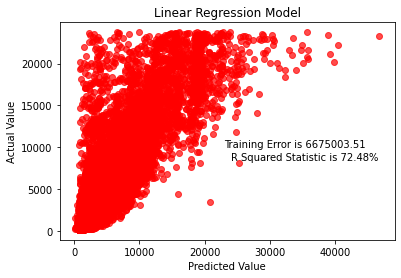

In [20]:
plt.scatter(y_pred_c, target_c, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Linear Regression Model')
plt.text(23000,10000, 'Training Error is 6675003.51')
plt.text(24000,8500, 'R Squared Statistic is 72.48%')
plt.show()

Testing Error

In [21]:
y_pred_tst = fitted_model_c.predict(predictors_test_c)

In [22]:
mean_squared_error(target_test_c,y_pred_tst, squared= False)

2578.4608725523094

In [23]:
mean_squared_error(target_test_c,y_pred_tst, squared= True)

6648460.471283218

In [24]:
r2_score(target_test_c,y_pred_tst)

0.7370858852563611

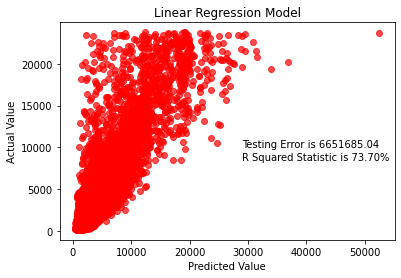

In [26]:
plt.scatter(y_pred_tst, target_test_c, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Linear Regression Model')
plt.text(29000,10000,'Testing Error is 6651685.04')
plt.text(29000,8500, 'R Squared Statistic is 73.70%')
plt.show()

Quandratic Regression

In [27]:
poly_model= pr.PolynomialFeatures(degree=2)
poly_x_values= poly_model.fit_transform(predictors_c)
poly_model.fit(poly_x_values,target_c)
regression_model= LinearRegression()
regression_model.fit(poly_x_values,target_c)

LinearRegression()

Training Error

In [28]:
y_pred=regression_model.predict(poly_x_values)

In [29]:
mean_squared_error(target_c,y_pred, squared= False)

2460.9861656991975

In [30]:
mean_squared_error(target_c,y_pred, squared= True)

6056452.9077628385

In [31]:
r2_score(target_c,y_pred)

0.7502972616259872

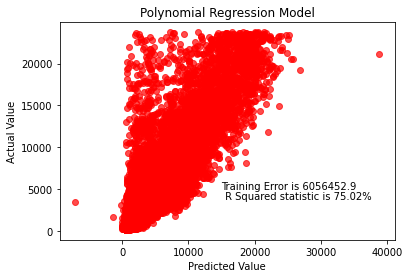

In [32]:
plt.scatter(y_pred, target_c, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Polynomial Regression Model')
plt.text(15000,5000,'Training Error is 6056452.9')
plt.text(15000,3800,' R Squared statistic is 75.02%')
# plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.show()

Testing Error

In [33]:
poly_x_values= poly_model.fit_transform(predictors_test_c)
y_pred_tst=regression_model.predict(poly_x_values)

In [34]:
mean_squared_error(target_test_c,y_pred_tst, squared= False)

2461.6329140005787

In [35]:
mean_squared_error(target_test_c,y_pred_tst, squared= True)

6059636.60329098

In [36]:
r2_score(target_test_c,y_pred_tst)

0.7603709911333951

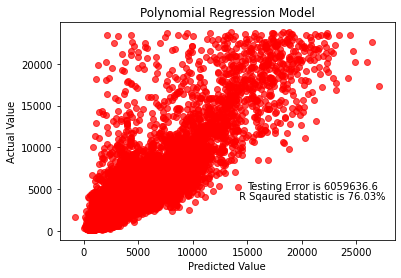

In [37]:
plt.scatter(y_pred_tst, target_test, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Polynomial Regression Model')
plt.text(15000, 5000, 'Testing Error is 6059636.6')
plt.text(14000, 3800,' R Sqaured statistic is 76.03%')
plt.show()

GAM

In [38]:
gam= pyg.LinearGAM(lam=3.9).gridsearch(predictors_c.values, target_c.values,n_splines=np.arange(4,30,1), spline_order= np.arange(1,4,1), keep_best= True, objective = 'auto')

  0% (0 of 78) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  1% (1 of 78) |                         | Elapsed Time: 0:00:00 ETA:   0:00:26
  2% (2 of 78) |                         | Elapsed Time: 0:00:00 ETA:   0:00:29
  3% (3 of 78) |                         | Elapsed Time: 0:00:01 ETA:   0:00:32
  5% (4 of 78) |#                        | Elapsed Time: 0:00:01 ETA:   0:00:31
  6% (5 of 78) |#                        | Elapsed Time: 0:00:02 ETA:   0:00:31
  7% (6 of 78) |#                        | Elapsed Time: 0:00:02 ETA:   0:00:34
  8% (7 of 78) |##                       | Elapsed Time: 0:00:03 ETA:   0:00:34
 10% (8 of 78) |##                       | Elapsed Time: 0:00:03 ETA:   0:00:35
 11% (9 of 78) |##                       | Elapsed Time: 0:00:04 ETA:   0:00:40
 12% (10 of 78) |###                     | Elapsed Time: 0:00:05 ETA:   0:00:46
 14% (11 of 78) |###                     | Elapsed Time: 0:00:06 ETA:   0:00:55
 15% (12 of 78) |###                    

In [39]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     73.6313
Link Function:                     IdentityLink Log Likelihood:                               -374876.7126
Number of Samples:                        22791 AIC:                                           749902.6878
                                                AICc:                                          749903.1848
                                                GCV:                                          5583608.1368
                                                Scale:                                        5551147.1719
                                                Pseudo R-Squared:                                   0.7719
Feature Function                  Lam

C:\Users\asus\AppData\Local\Temp\ipykernel_5336\3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


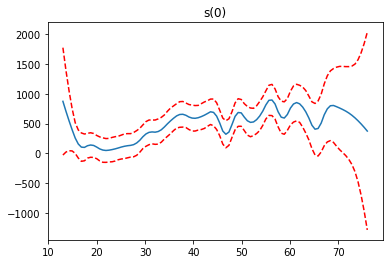

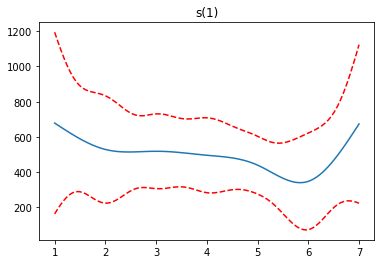

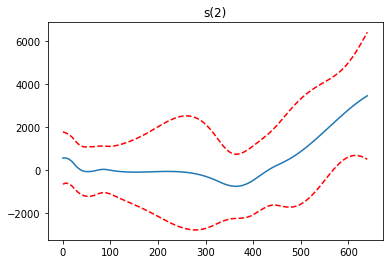

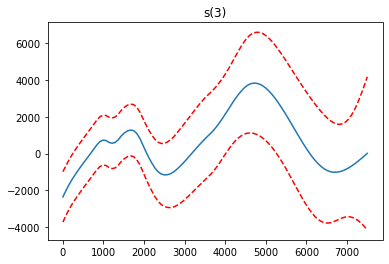

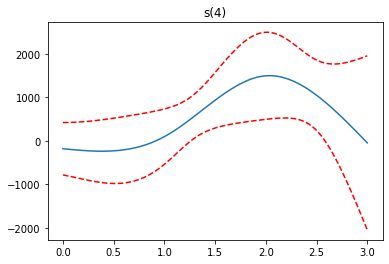

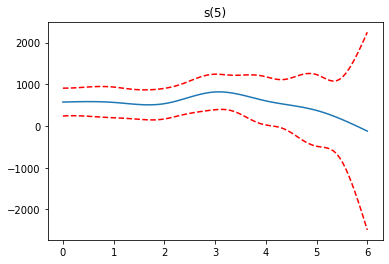

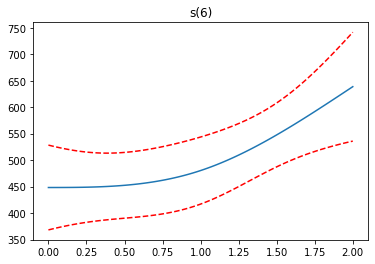

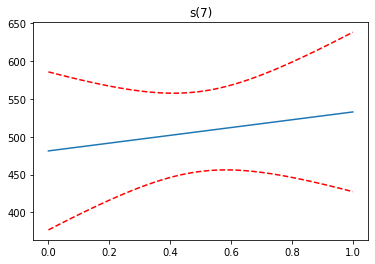

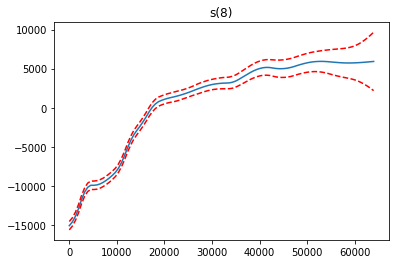

In [40]:
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(repr(term))
    plt.show()

Training Error

In [41]:
y_pred= gam.predict(predictors_c)

In [42]:
mean_squared_error(target_c, y_pred, squared= False)

2352.2782525825523

In [43]:
mean_squared_error(target_c, y_pred, squared= True)

5533212.977572826

In [44]:
r2_score(target_c, y_pred)

0.7718700279604876

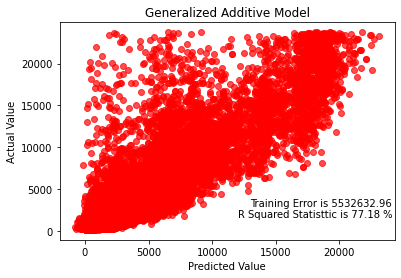

In [45]:
plt.scatter(y_pred, target_c, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Generalized Additive Model')
plt.text(13000, 3000, 'Training Error is 5532632.96')
plt.text(12000, 1700, 'R Squared Statisttic is 77.18 %')
# plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.show()

Testing Error

In [46]:
y_pred_tst= gam.predict(predictors_test_c)

In [47]:
mean_squared_error(target_test_c, y_pred_tst, squared= False)

2342.7263334529907

In [48]:
mean_squared_error(target_test_c, y_pred_tst, squared= True)

5488366.673454093

In [49]:
r2_score(target_test_c, y_pred_tst)

0.7829619245579773

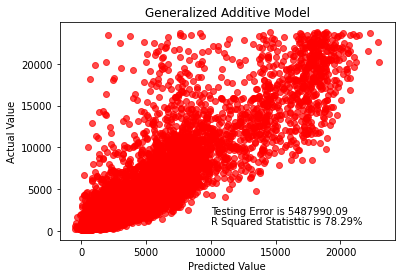

In [50]:
plt.scatter(y_pred_tst, target_test_c, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Generalized Additive Model')
plt.text(10000, 2000, 'Testing Error is 5487990.09')
plt.text(10000, 800, 'R Squared Statisttic is 78.29%')
plt.show()

Bagging Regressor

In [51]:
model=BaggingRegressor(n_estimators= 100,max_samples= 0.35, n_jobs=-1,random_state=56, bootstrap= True, oob_score= False)
fitted=model.fit(predictors_c,target_c)
model.score(predictors_c,target_c)

0.8782863804643763

Training Error

In [52]:
y_pred= model.predict(predictors_c)

In [53]:
mean_squared_error(target_c,y_pred, squared= False)

1718.173864737912

In [54]:
mean_squared_error(target_c,y_pred, squared= True)

2952121.429468413

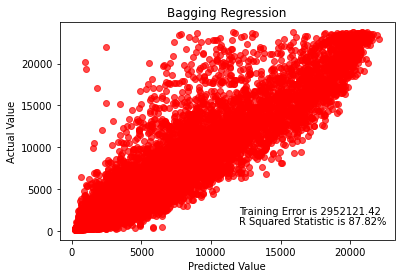

In [56]:
plt.scatter(y_pred, target_c, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Bagging Regression')
plt.text(12000, 2000,'Training Error is 2952121.42')
plt.text(12000, 800,'R Squared Statistic is 87.82%')
plt.show()

Testing Error

In [57]:
y_pred_tst=model.predict(predictors_test_c)

In [58]:
mean_squared_error(target_test_c,y_pred_tst, squared= False)

2375.4015281300726

In [59]:
mean_squared_error(target_test_c,y_pred_tst)

5642532.419842684

In [60]:
r2_score(target_test_c,y_pred_tst)

0.7768654228324093

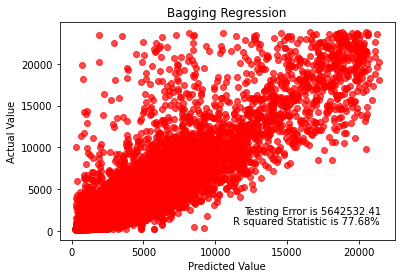

In [61]:
plt.scatter(y_pred_tst, target_test_c, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Bagging Regression')
plt.text(12000,2000,'Testing Error is 5642532.41')
plt.text(11000,800,' R squared Statistic is 77.68%')
plt.show()

Random Forest Regressor

In [62]:
ranforreg= RandomForestRegressor(n_estimators= 500, n_jobs= -1, max_samples=0.55, random_state= 56, max_features= "sqrt", bootstrap= True, oob_score= True, max_depth=15, max_leaf_nodes=100)
ranforreg.fit(predictors_c,target_c)
print('Training Coefficient of r^2: %.3f'%ranforreg.score(predictors_c,target_c))

Training Coefficient of r^2: 0.783


Training Error

In [64]:
y_pred= ranforreg.predict(predictors_c)

In [65]:
mean_squared_error(target_c,y_pred, squared= False)

2294.785037332075

In [66]:
mean_squared_error(target_c,y_pred, squared= True)

5266038.367563172

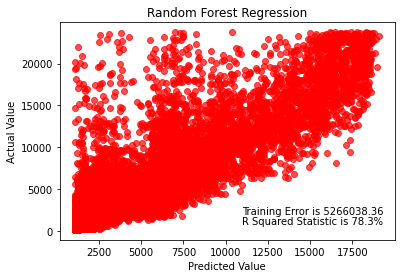

In [67]:
plt.scatter(y_pred, target_c, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Random Forest Regression')
plt.text(11000,2000,'Training Error is 5266038.36')
plt.text(11000,800,'R Squared Statistic is 78.3%')
plt.show()

Testing Error

In [68]:
y_pred_tst= ranforreg.predict(predictors_test_c)

In [69]:
mean_squared_error(target_test,y_pred_tst, squared = False)

2389.9448033537983

In [70]:
mean_squared_error(target_test_c,y_pred_tst, squared = True)

5711836.163077827

In [71]:
r2_score(target_test_c,y_pred_tst)

0.7741247985360342

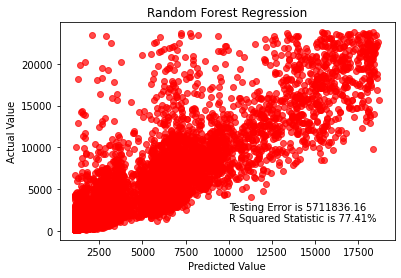

In [76]:
plt.scatter(y_pred_tst, target_test_c, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Random Forest Regression')
plt.text(10000, 2500,'Testing Error is 5711836.16')
plt.text(10000, 1200,'R Squared Statistic is 77.41%')
plt.show()

Gradient Boosting

In [73]:
gbr = GradientBoostingRegressor(learning_rate=0.015, max_features='sqrt',max_depth=12, max_leaf_nodes=12 ,n_estimators=250, random_state= 56, criterion= 'squared_error', warm_start=True)
gbr.fit(predictors_c, target_c)
gbr.score(predictors_c,target_c)

0.7800800481364363

Training Error

In [74]:
y_pred= gbr.predict(predictors_c)

In [75]:
mean_squared_error(target_c,y_pred, squared= False)

2309.5631186593578

In [77]:
mean_squared_error(target_c,y_pred, squared= True)

5334081.799071538

In [78]:
r2_score(target_c,y_pred)

0.7800800481364363

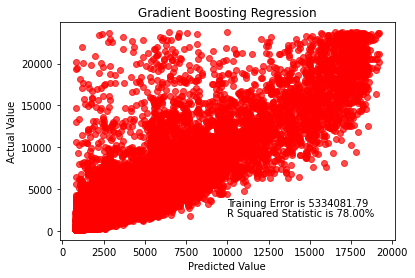

In [79]:
plt.scatter(y_pred, target_c, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Gradient Boosting Regression')
plt.text(10000, 3000,'Training Error is 5334081.79')
plt.text(10000, 1800,'R Squared Statistic is 78.00%')
plt.show()

Testing Error

In [80]:
y_pred_tst= gbr.predict(predictors_test_c)

In [81]:
mean_squared_error(target_test_c,y_pred_tst, squared= False)

2348.712520307036

In [82]:
mean_squared_error(target_test_c,y_pred_tst, squared= True)

5516450.5030470295

In [83]:
r2_score(target_test_c,y_pred_tst)

0.7818513463680444

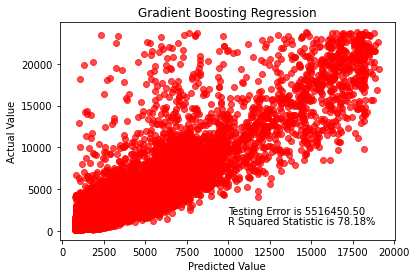

In [84]:
plt.scatter(y_pred_tst, target_test, alpha=.7,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Gradient Boosting Regression')
plt.text(10000, 2000,'Testing Error is 5516450.50')
plt.text(10000, 800,'R Squared Statistic is 78.18%')
plt.show()

ANN

In [163]:
model=Sequential()
model.add(Dense(64, input_dim= 9, activation = 'relu'))
model.add(Dense(32, activation = 'relu', kernel_initializer= 'uniform'))
model.add(Dense(16, activation = 'relu', kernel_initializer= 'uniform'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss= 'mse', optimizer= 'adam', metrics= 'mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                640       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________


In [164]:
history= model.fit(predictors_c, target_c, validation_data= (predictors_test_c, target_test_c), epochs= 1000, batch_size=64)

Epoch 1/1000
357/357 [==============================] - 3s 4ms/step - loss: 44327500.0000 - mse: 44327500.0000 - val_loss: 40769200.0000 - val_mse: 40769200.0000
Epoch 2/1000
357/357 [==============================] - 1s 3ms/step - loss: 7824812.5000 - mse: 7824812.5000 - val_loss: 6736910.5000 - val_mse: 6736910.5000
Epoch 3/1000
357/357 [==============================] - 1s 3ms/step - loss: 6763731.0000 - mse: 6763731.0000 - val_loss: 6542033.5000 - val_mse: 6542033.5000
Epoch 4/1000
357/357 [==============================] - 1s 3ms/step - loss: 6412482.5000 - mse: 6412482.5000 - val_loss: 6274825.5000 - val_mse: 6274825.5000
Epoch 5/1000
357/357 [==============================] - 1s 4ms/step - loss: 6260695.0000 - mse: 6260695.0000 - val_loss: 6262195.5000 - val_mse: 6262195.5000
Epoch 6/1000
357/357 [==============================] - 1s 4ms/step - loss: 6217436.5000 - mse: 6217436.5000 - val_loss: 6209464.5000 - val_mse: 6209464.5000
Epoch 7/1000
357/357 [==========================

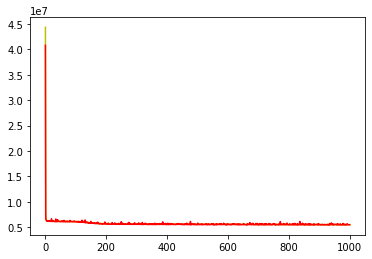

In [165]:
loss= history.history['loss']
val_loss= history.history['val_loss']
epochs= range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label= 'Training Loss')
plt.plot(epochs, val_loss, 'r', label= 'Validation Loss')

Training Error

In [167]:
y_pred= model.predict(predictors_c)

713/713 [==============================] - 1s 2ms/step


In [170]:
mean_squared_error(target_c, y_pred, squared = False)

2330.216550817216

In [168]:
mean_squared_error(target_c, y_pred, squared = True)

5429909.173702484

In [169]:
r2_score(target_c, y_pred)

0.7761291616652694

Testing Error

In [171]:
y_test_pred= model.predict(predictors_test_c)

306/306 [==============================] - 1s 2ms/step


In [172]:
r2_score(target_test_c, y_test_pred)

0.7833711815932981

In [173]:
mean_squared_error(target_test_c, y_test_pred, squared= False)

2340.5165146523987

In [174]:
mean_squared_error(target_test_c, y_test_pred, squared= True)

5478017.555360612